## Data Science Capstone Project
### EPA air quality data set for the Mid-Atlantic Region

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [223]:
## importing csv from file folder
import csv
df = pd.read_csv(r'C:/Users/vanes/Documents/Data Science Capstone Proj/Region3_CancerRisk_by_block_poll.csv') 

### Bring in EPA data set

In [224]:
df

State    EPA Region   County   FIPS            Block  Population  \
0         DE  EPA Region 3     Kent  10001  100010401001000         108   
1         DE  EPA Region 3     Kent  10001  100010401001001          44   
2         DE  EPA Region 3     Kent  10001  100010401001002          74   
3         DE  EPA Region 3     Kent  10001  100010401001003          60   
4         DE  EPA Region 3     Kent  10001  100010401001004          12   
...      ...           ...      ...    ...              ...         ...   
529320    WV  EPA Region 3  Wyoming  54109  541090032005037          38   
529321    WV  EPA Region 3  Wyoming  54109  541090032005038          72   
529322    WV  EPA Region 3  Wyoming  54109  541090032005039          22   
529323    WV  EPA Region 3  Wyoming  54109  541090032005040          12   
529324    WV  EPA Region 3  Wyoming  54109  541090032005041           1   

        Total Cancer Risk (per million)  1,1,2-TRICHLOROETHANE  \
0                                    30           7.052680e-08   
1                                    30           3.653130e-08   
2                                    30           3.344080e-08   
3                                    30           3.344080e-08   
4                                    30           3.344080e-08   
...                                 ...                    ...   
529320                               20           7.194070e-05   
529321                               20           8.524380e-05   
529322                               20           8.275670e-05   
529323                               20           9.063200e-05   
529324                               20           9.063210e-05   

        1,2-DIBROMO-3-CHLOROPROPANE  1,2-DIPHENYLHYDRAZINE  ...  \
0                               0.0                    0.0  ...   
1                               0.0                    0.0  ...   
2                               0.0                    0.0  ...   
3                               0.0                    0.0  ...   
4                               0.0                    0.0  ...   
...                             ...                    ...  ...   
529320                          0.0                    0.0  ...   
529321                          0.0                    0.0  ...   
529322                          0.0                    0.0  ...   
529323                          0.0                    0.0  ...   
529324                          0.0                    0.0  ...   

        PROPYLENE OXIDE  TETRACHLOROETHYLENE  2,4-TOLUENE DIAMINE  \
0              0.000011             0.003120                  0.0   
1              0.000006             0.003035                  0.0   
2              0.000006             0.003027                  0.0   
3              0.000006             0.003027                  0.0   
4              0.000006             0.003027                  0.0   
...                 ...                  ...                  ...   
529320         0.000001             0.003460                  0.0   
529321         0.000001             0.002493                  0.0   
529322         0.000001             0.002442                  0.0   
529323         0.000001             0.002654                  0.0   
529324         0.000001             0.002693                  0.0   

        TOXAPHENE (CHLORINATED CAMPHENE)  TRICHLOROETHYLENE  VINYL BROMIDE  \
0                                    0.0           0.013946              0   
1                                    0.0           0.023399              0   
2                                    0.0           0.021661              0   
3                                    0.0           0.019990              0   
4                                    0.0           0.018584              0   
...                                  ...                ...            ...   
529320                               0.0           0.005131              0   
529321                               0.0           0.00

### Clean Column Names

In [225]:
def clean_column_names(df,columns):
    def replace_characters(value):
        if isinstance(value, str):  # Ensure the value is a string
            # Replace numbers, commas, and dashes with an empty string
            return ''.join(filter(lambda x: not x.isdigit() and x not in [',', '-','(',')'], value))
        return value  # Return non-string values unchanged

    # Apply the cleaning function to the specified columns
    for column in columns:
        if column in df.columns:
            df[column] = df[column].apply(replace_characters)

    df.columns = [''.join(filter(lambda x: not x.isdigit() and x not in [',', '-','(',')'], col)) for col in df.columns]
    return df

clean_df = clean_column_names(df,df.columns)
clean_df.head()



State   EPA Region County   FIPS            Block  Population  \
0    DE  EPA Region    Kent  10001  100010401001000         108   
1    DE  EPA Region    Kent  10001  100010401001001          44   
2    DE  EPA Region    Kent  10001  100010401001002          74   
3    DE  EPA Region    Kent  10001  100010401001003          60   
4    DE  EPA Region    Kent  10001  100010401001004          12   

   Total Cancer Risk per million  TRICHLOROETHANE  DIBROMOCHLOROPROPANE  \
0                             30     7.052680e-08                   0.0   
1                             30     3.653130e-08                   0.0   
2                             30     3.344080e-08                   0.0   
3                             30     3.344080e-08                   0.0   
4                             30     3.344080e-08                   0.0   

   DIPHENYLHYDRAZINE  ...  PROPYLENE OXIDE  TETRACHLOROETHYLENE  \
0                0.0  ...         0.000011             0.003120   
1                0.0  ...         0.000006             0.003035   
2                0.0  ...         0.000006             0.003027   
3                0.0  ...         0.000006             0.003027   
4                0.0  ...         0.000006             0.003027   

   TOLUENE DIAMINE  TOXAPHENE CHLORINATED CAMPHENE  TRICHLOROETHYLENE  \
0              0.0                             0.0           0.013946   
1              0.0                             0.0           0.023399   
2              0.0                             0.0           0.021661   
3              0.0                             0.0           0.019990   
4              0.0                             0.0           0.018584   

   VINYL BROMIDE  VINYL CHLORIDE    OTOLUIDINE   DIOXANE    PAHPOM  
0              0        0.004659  3.362410e-07  0.000002  0.699001  
1              0        0.003186  1.741660e-07  0.000002  0.712712  
2              0        0.003118  1.594320e-07  0.000002  0.720064  
3              0        0.003260  1.594320e-07  0.000002  0.717010  
4              0        0.003253  1.594320e-07  0.000002  0.705732  

[5 rows x 79 columns]

In [226]:
df.columns

Index(['State', 'EPA Region', 'County', 'FIPS', 'Block', 'Population',
       'Total Cancer Risk per million', 'TRICHLOROETHANE',
       'DIBROMOCHLOROPROPANE', 'DIPHENYLHYDRAZINE', 'HEXACHLOROCYCLYHEXANE',
       'BUTADIENE', 'DICHLOROPROPENE', 'PROPANE SULTONE', 'DICHLOROBENZENE',
       'ACETYLAMINOFLUORENE', 'NITROPROPANE', 'DINITROTOLUENE',
       'TOLUENE DIISOCYANATE', 'TRICHLOROPHENOL', ''DICHLOROBENZIDINE',
       'DIMETHYLAMINOAZOBENZENE', ''METHYLENE BISCHLOROANILINE',
       ''METHYLENEDIANILINE', 'ACETALDEHYDE', 'ACETAMIDE', 'ACRYLAMIDE',
       'ACRYLONITRILE', 'ALLYL CHLORIDE', 'ANILINE',
       'ARSENIC COMPOUNDSINORGANIC INCLUDING ARSINE', 'BENZOAPYRENE',
       'BENZENE', 'BENZIDINE', 'BENZYL CHLORIDE', 'BERYLLIUM COMPOUNDS',
       'BISETHYLHEXYLPHTHALATE DEHP', 'BISCHLOROMETHYL ETHER', 'BROMOFORM',
       'CHROMIUM VI HEXAVALENT', 'CADMIUM COMPOUNDS', 'CARBON TETRACHLORIDE',
       'CHLORDANE', 'CHLOROBENZILATE', 'CHLOROPRENE', 'COKE OVEN EMISSIONS',
       'DICHLOR

In [139]:
df.shape

(529325, 79)

### Filter for the State of Pennsylvania

In [140]:
Pennsylvania = df[df['State']=='PA']

Pennsylvania

State   EPA Region County   FIPS            Block  Population  \
85091     PA  EPA Region   Adams  42001  420010301011000          11   
85092     PA  EPA Region   Adams  42001  420010301011001          28   
85093     PA  EPA Region   Adams  42001  420010301011002          13   
85094     PA  EPA Region   Adams  42001  420010301011003          70   
85095     PA  EPA Region   Adams  42001  420010301011004           8   
...      ...          ...    ...    ...              ...         ...   
360109    PA  EPA Region    York  42133  421330240022030          44   
360110    PA  EPA Region    York  42133  421330240022031          21   
360111    PA  EPA Region    York  42133  421330240022032          37   
360112    PA  EPA Region    York  42133  421330240022035          59   
360113    PA  EPA Region    York  42133  421330240022036          17   

        Total Cancer Risk per million  TRICHLOROETHANE  DIBROMOCHLOROPROPANE  \
85091                              30         0.000013                   0.0   
85092                              30         0.000013                   0.0   
85093                              30         0.000014                   0.0   
85094                              30         0.000015                   0.0   
85095                              30         0.000016                   0.0   
...                               ...              ...                   ...   
360109                             30         0.000021                   0.0   
360110                             30         0.000031                   0.0   
360111                             30         0.000030                   0.0   
360112                             30         0.000011                   0.0   
360113                             30         0.000027                   0.0   

        DIPHENYLHYDRAZINE  ...  PROPYLENE OXIDE  TETRACHLOROETHYLENE  \
85091                 0.0  ...         0.000059             0.003170   
85092                 0.0  ...         0.000058             0.003185   
85093                 0.0  ...         0.000056             0.003199   
85094                 0.0  ...         0.000055             0.003205   
85095                 0.0  ...         0.000054             0.003204   
...                   ...  ...              ...                  ...   
360109                0.0  ...         0.000039             0.003288   
360110                0.0  ...         0.000037             0.003283   
360111                0.0  ...         0.000038             0.003263   
360112                0.0  ...         0.000036             0.003259   
360113                0.0  ...         0.000041             0.003293   

        TOLUENE DIAMINE  TOXAPHENE CHLORINATED CAMPHENE  TRICHLOROETHYLENE  \
85091               0.0                             0.0           0.006439   
85092               0.0                             0.0           0.006482   
85093               0.0                             0.0           0.006522   
85094               0.0                             0.0           0.006537   
85095               0.0                             0.0           0.006531   
...                 ...                             ...                ...   
360109              0.0                             0.0           0.008526   
360110              0.0                             0.0           0.008628   
360111              0.0                             0.0           0.008520   
360112              0.0                             0.0           0.008386   
360113              0.0                             0.0           0.008555   

        VINYL BROMIDE  VINYL CHLORIDE    OTOLUIDINE       DIOXANE    PAHPOM  
85091               0        0.001903  1.487230e-07  1.491400e-07  0.760534  
85092               0        0.001977  1.487230e-07  1.491400e-07  0.760386  
85093               0        0.002047  1.487230e-07  1.491400e-07  0.760357  
85094               0        0.002075  1.487230e-07  1.491400e-07  

In [141]:
Pennsylvania.shape

(275023, 79)

In [142]:
# average chemical 1 value
C1_avg = np.average(Pennsylvania['TRICHLOROETHANE'])
C1_avg

0.0001670438456288098

In [143]:
# standard deviation chemical 1 value
C1_sd = np.std(Pennsylvania['TRICHLOROETHANE'])
C1_sd

0.0007632424165726982

In [144]:
import statistics
import math

In [145]:
C1_median = statistics.median(Pennsylvania['TRICHLOROETHANE'])
C1_median

8.03174e-05

In [146]:
C1_mode = statistics.mode(Pennsylvania['TRICHLOROETHANE'])
C1_mode

9.50033e-05

In [147]:
# Min Population per block

min(Pennsylvania['Population'])

1

In [148]:
# Max Population per block

max(Pennsylvania['Population'])

3163

In [149]:
# Total Population in Pennsylvania

sum(Pennsylvania['Population'])

13002700

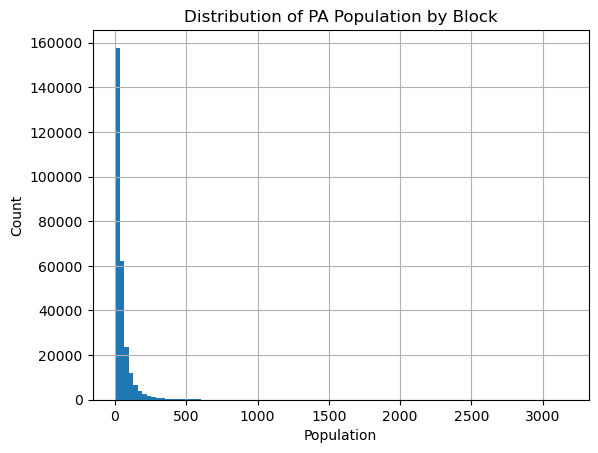

In [150]:
#Population Distribution

Pennsylvania['Population'].hist(bins=100)
plt.title('Distribution of PA Population by Block')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

In [151]:
# Number of unique Counties

Pennsylvania['County'].nunique()

67

### Group PA Population by County

In [152]:
# Population by County

Pop_by_county = Pennsylvania.groupby(['County'], as_index=False)['Population'].sum()

Pop_by_county

County  Population
0          Adams      103852
1      Allegheny     1250578
2      Armstrong       65558
3         Beaver      168215
4        Bedford       47577
..           ...         ...
62    Washington      209349
63         Wayne       51155
64  Westmoreland      354663
65       Wyoming       26069
66          York      456438

[67 rows x 2 columns]

In [153]:
Pop_by_county_sort = Pop_by_county.sort_values(by=['Population'], ascending=False)
Pop_by_county_sort

County  Population
50  Philadelphia     1603797
1      Allegheny     1250578
45    Montgomery      856553
8          Bucks      646538
22      Delaware      576830
..           ...         ...
52        Potter       16396
28        Fulton       14556
26        Forest        6973
56      Sullivan        5840
11       Cameron        4547

[67 rows x 2 columns]

In [154]:
max(Pop_by_county['Population'])

1603797

In [155]:
Pop_by_county_asc = Pop_by_county.sort_values(by=['Population'])
Pop_by_county_asc

County  Population
11       Cameron        4547
56      Sullivan        5840
26        Forest        6973
28        Fulton       14556
52        Potter       16396
..           ...         ...
22      Delaware      576830
8          Bucks      646538
45    Montgomery      856553
1      Allegheny     1250578
50  Philadelphia     1603797

[67 rows x 2 columns]

In [156]:
Pop_by_county.dtypes

County        object
Population     int64
dtype: object

### Create new column for urban, suburban, rural

In [157]:
Pop_by_county['County_Type'] = Pop_by_county['Population'].case_when([
    (Pop_by_county['Population'] >= 500000, 'urban'),
    (Pop_by_county['Population']>=150001, 'suburban'),
    (Pop_by_county['Population'] <= 150000, 'rural')]
)

In [158]:
Pop_by_county

County  Population County_Type
0          Adams      103852       rural
1      Allegheny     1250578       urban
2      Armstrong       65558       rural
3         Beaver      168215    suburban
4        Bedford       47577       rural
..           ...         ...         ...
62    Washington      209349    suburban
63         Wayne       51155       rural
64  Westmoreland      354663    suburban
65       Wyoming       26069       rural
66          York      456438    suburban

[67 rows x 3 columns]

In [159]:
Pop_by_county.dtypes

County         object
Population      int64
County_Type    object
dtype: object

In [160]:
Num_County_Types = Pop_by_county.groupby(['County_Type'])['County_Type'].count()

Num_County_Types


County_Type
rural       44
suburban    16
urban        7
Name: County_Type, dtype: int64

### Graph Population by County and County Type

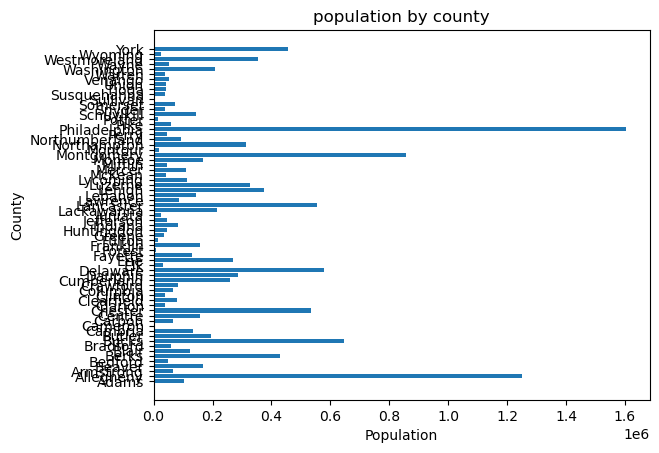

In [161]:
# Pop_by_county.plot(kind='bar')
x=Pop_by_county['Population']
y=Pop_by_county['County']
plt.barh(y,x)
plt.title('population by county')
plt.xlabel('Population')
plt.ylabel('County')
plt.show()

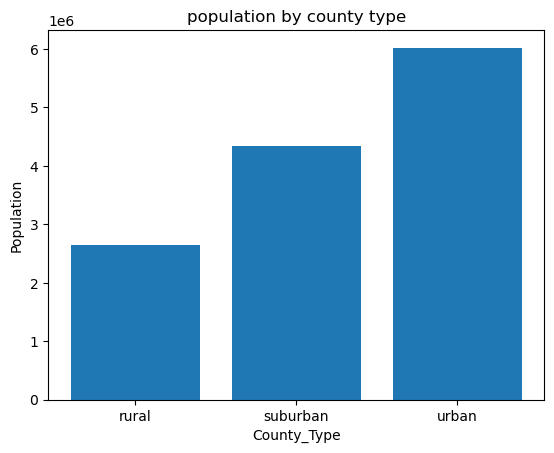

In [164]:
grouped_pop_by_county = Pop_by_county.groupby('County_Type')['Population'].sum().reset_index()

# plt.bar(grouped_pop_by_county['County_Type'],grouped_pop_by_county['Population'])

x=grouped_pop_by_county['County_Type']
y=grouped_pop_by_county['Population']
plt.bar(x,y)
plt.title('population by county type')
plt.xlabel('County_Type')
plt.ylabel('Population')
plt.show()

In [165]:
grouped_pop_by_county

County_Type  Population
0       rural     2641555
1    suburban     4339452
2       urban     6021693

<Axes: xlabel='Population', ylabel='TRICHLOROETHANE'>

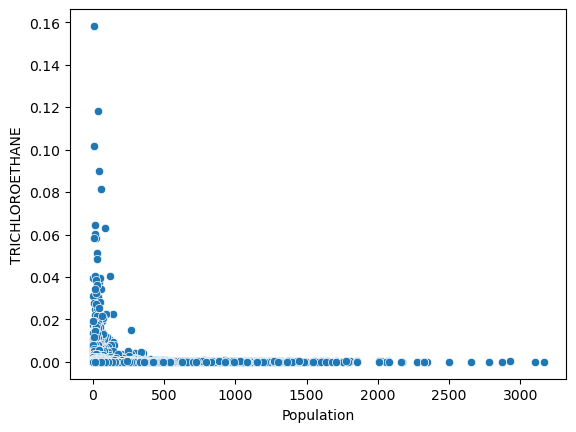

In [166]:
sns.scatterplot(x='Population', 
                y='TRICHLOROETHANE', 
                data =Pennsylvania)


In [168]:
# Simple Linear Regression 
from sklearn.linear_model import LinearRegression

X_PA = Pennsylvania[['TRICHLOROETHANE']]
y_PA = Pennsylvania['Total Cancer Risk per million']
#TO-DO: run a simple linear regression, use .fit()
model = LinearRegression()
reg_PA = model.fit(X_PA, y_PA)

print(f"Regression Coefficient (PA): {reg_PA.coef_[0]}, Intercept: {reg_PA.intercept_}")

Regression Coefficient (PA): 638.6531294735346, Intercept: 28.800135627665664


In [101]:
from scipy.stats import pearsonr

Pearson Correlation (PA): 0.07258402739926641


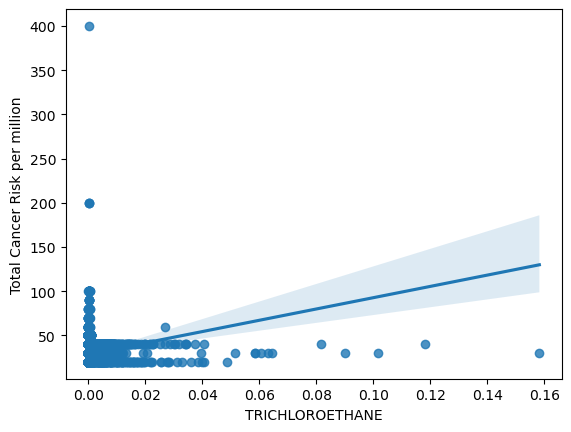

In [216]:
sns.regplot(x='TRICHLOROETHANE', 
                y='Total Cancer Risk per million', 
                data =Pennsylvania)

# TO-DO: Pearson correlation between 1,1,2-TRICHLOROETHANE and Total Cancer Risk (per million)
correlation_PA = pearsonr(Pennsylvania['TRICHLOROETHANE'], Pennsylvania['Total Cancer Risk per million'])
print(f"Pearson Correlation (PA): {correlation_PA[0]}")


In [208]:
df.columns


Index(['State', 'EPA Region', 'County', 'FIPS', 'Block', 'Population',
       'Total Cancer Risk per million', 'TRICHLOROETHANE',
       'DIBROMOCHLOROPROPANE', 'DIPHENYLHYDRAZINE', 'HEXACHLOROCYCLYHEXANE',
       'BUTADIENE', 'DICHLOROPROPENE', 'PROPANE SULTONE', 'DICHLOROBENZENE',
       'ACETYLAMINOFLUORENE', 'NITROPROPANE', 'DINITROTOLUENE',
       'TOLUENE DIISOCYANATE', 'TRICHLOROPHENOL', ''DICHLOROBENZIDINE',
       'DIMETHYLAMINOAZOBENZENE', ''METHYLENE BISCHLOROANILINE',
       ''METHYLENEDIANILINE', 'ACETALDEHYDE', 'ACETAMIDE', 'ACRYLAMIDE',
       'ACRYLONITRILE', 'ALLYL CHLORIDE', 'ANILINE',
       'ARSENIC COMPOUNDSINORGANIC INCLUDING ARSINE', 'BENZOAPYRENE',
       'BENZENE', 'BENZIDINE', 'BENZYL CHLORIDE', 'BERYLLIUM COMPOUNDS',
       'BISETHYLHEXYLPHTHALATE DEHP', 'BISCHLOROMETHYL ETHER', 'BROMOFORM',
       'CHROMIUM VI HEXAVALENT', 'CADMIUM COMPOUNDS', 'CARBON TETRACHLORIDE',
       'CHLORDANE', 'CHLOROBENZILATE', 'CHLOROPRENE', 'COKE OVEN EMISSIONS',
       'DICHLOR

In [204]:
chemical_list = ['TRICHLOROETHANE',
       'DIBROMOCHLOROPROPANE', 'DIPHENYLHYDRAZINE', 'HEXACHLOROCYCLYHEXANE',
       'BUTADIENE', 'DICHLOROPROPENE', 'PROPANE SULTONE', 'DICHLOROBENZENE',
       'ACETYLAMINOFLUORENE', 'NITROPROPANE', 'DINITROTOLUENE',
       'TOLUENE DIISOCYANATE', 'TRICHLOROPHENOL', 'DICHLOROBENZIDINE',
       'DIMETHYLAMINOAZOBENZENE', 'METHYLENE BISCHLOROANILINE',
       'METHYLENEDIANILINE', 'ACETALDEHYDE', 'ACETAMIDE', 'ACRYLAMIDE',
       'ACRYLONITRILE', 'ALLYL CHLORIDE', 'ANILINE',
       'ARSENIC COMPOUNDSINORGANIC INCLUDING ARSINE', 'BENZOAPYRENE',
       'BENZENE', 'BENZIDINE', 'BENZYL CHLORIDE', 'BERYLLIUM COMPOUNDS',
       'BISETHYLHEXYLPHTHALATE DEHP', 'BISCHLOROMETHYL ETHER', 'BROMOFORM',
       'CHROMIUM VI HEXAVALENT', 'CADMIUM COMPOUNDS', 'CARBON TETRACHLORIDE',
       'CHLORDANE', 'CHLOROBENZILATE', 'CHLOROPRENE', 'COKE OVEN EMISSIONS',
       'DICHLOROETHYL ETHER BIS[CHLOROETHYL]ETHER', 'EPICHLOROHYDRIN',
       'ETHYLBENZENE', 'ETHYL CARBAMATE URETHANE CHLORIDE CHLOROETHANE',
       'ETHYLENE DIBROMIDE DIBROMOETHANE',
       'ETHYLENE DICHLORIDE DICHLOROETHANE', 'ETHYLENE OXIDE',
       'ETHYLENE THIOUREA', 'ETHYLIDENE DICHLORIDE DICHLOROETHANE',
       'FORMALDEHYDE', 'HEPTACHLOR', 'HEXACHLOROBENZENE',
       'HEXACHLOROBUTADIENE', 'HYDRAZINE', 'METHYL TERTBUTYL ETHER',
       'METHYLENE CHLORIDE', 'NNITROSODIMETHYLAMINE', 'NNITROSOMORPHOLINE',
       'NICKEL COMPOUNDS', 'NAPHTHALENE', 'NITROBENZENE',
       'POLYCHLORINATED BIPHENYLS AROCLORS', 'PENTACHLOROPHENOL',
       'PROPYLENE OXIDE', 'TETRACHLOROETHYLENE', 'TOLUENE DIAMINE',
       'TOXAPHENE CHLORINATED CAMPHENE', 'TRICHLOROETHYLENE', 'VINYL BROMIDE',
       'VINYL CHLORIDE', 'OTOLUIDINE', 'DIOXANE', 'PAHPOM']

### Create Correlation Matrix
#### Correlation between each chemical and total cancer risk per million

In [212]:
PA_Corr = Pennsylvania[['Total Cancer Risk per million', 'TRICHLOROETHANE',
       'DIBROMOCHLOROPROPANE', 'DIPHENYLHYDRAZINE', 'HEXACHLOROCYCLYHEXANE',
       'BUTADIENE', 'DICHLOROPROPENE', 'PROPANE SULTONE', 'DICHLOROBENZENE',
       'ACETYLAMINOFLUORENE', 'NITROPROPANE', 'DINITROTOLUENE',
       'TOLUENE DIISOCYANATE', 'TRICHLOROPHENOL', 
       'DIMETHYLAMINOAZOBENZENE', 'ACETALDEHYDE', 'ACETAMIDE', 'ACRYLAMIDE',
       'ACRYLONITRILE', 'ALLYL CHLORIDE', 'ANILINE',
       'ARSENIC COMPOUNDSINORGANIC INCLUDING ARSINE', 'BENZOAPYRENE',
       'BENZENE', 'BENZIDINE', 'BENZYL CHLORIDE', 'BERYLLIUM COMPOUNDS',
       'BISETHYLHEXYLPHTHALATE DEHP', 'BISCHLOROMETHYL ETHER', 'BROMOFORM',
       'CHROMIUM VI HEXAVALENT', 'CADMIUM COMPOUNDS', 'CARBON TETRACHLORIDE',
       'CHLORDANE', 'CHLOROBENZILATE', 'CHLOROPRENE', 'COKE OVEN EMISSIONS',
       'DICHLOROETHYL ETHER BIS[CHLOROETHYL]ETHER', 'EPICHLOROHYDRIN',
       'ETHYLBENZENE', 'ETHYL CARBAMATE URETHANE CHLORIDE CHLOROETHANE',
       'ETHYLENE DIBROMIDE DIBROMOETHANE',
       'ETHYLENE DICHLORIDE DICHLOROETHANE', 'ETHYLENE OXIDE',
       'ETHYLENE THIOUREA', 'ETHYLIDENE DICHLORIDE DICHLOROETHANE',
       'FORMALDEHYDE', 'HEPTACHLOR', 'HEXACHLOROBENZENE',
       'HEXACHLOROBUTADIENE', 'HYDRAZINE', 'METHYL TERTBUTYL ETHER',
       'METHYLENE CHLORIDE', 'NNITROSODIMETHYLAMINE', 'NNITROSOMORPHOLINE',
       'NICKEL COMPOUNDS', 'NAPHTHALENE', 'NITROBENZENE',
       'POLYCHLORINATED BIPHENYLS AROCLORS', 'PENTACHLOROPHENOL',
       'PROPYLENE OXIDE', 'TETRACHLOROETHYLENE', 'TOLUENE DIAMINE',
       'TOXAPHENE CHLORINATED CAMPHENE', 'TRICHLOROETHYLENE', 'VINYL BROMIDE',
       'VINYL CHLORIDE', 'OTOLUIDINE', 'DIOXANE', 'PAHPOM']]

In [219]:
correlation_matrix = PA_Corr.corr()
correlation_matrix

Total Cancer Risk per million  TRICHLOROETHANE  \
Total Cancer Risk per million                       1.000000         0.072584   
TRICHLOROETHANE                                     0.072584         1.000000   
DIBROMOCHLOROPROPANE                               -0.095765        -0.013295   
DIPHENYLHYDRAZINE                                   0.062723         0.010324   
HEXACHLOROCYCLYHEXANE                               0.058436         0.008915   
...                                                      ...              ...   
VINYL BROMIDE                                            NaN              NaN   
VINYL CHLORIDE                                      0.239752         0.016356   
OTOLUIDINE                                          0.320772         0.000694   
DIOXANE                                             0.051940        -0.007990   
PAHPOM                                              0.601104        -0.002430   

                               DIBROMOCHLOROPROPANE  DIPHENYLHYDRAZINE  \
Total Cancer Risk per million             -0.095765           0.062723   
TRICHLOROETHANE                           -0.013295           0.010324   
DIBROMOCHLOROPROPANE                       1.000000          -0.015292   
DIPHENYLHYDRAZINE                         -0.015292           1.000000   
HEXACHLOROCYCLYHEXANE                     -0.014476           0.992389   
...                                             ...                ...   
VINYL BROMIDE                                   NaN                NaN   
VINYL CHLORIDE                            -0.040471          -0.041872   
OTOLUIDINE                                -0.055117          -0.033996   
DIOXANE                                   -0.008276          -0.011652   
PAHPOM                                    -0.107873          -0.015115   

                               HEXACHLOROCYCLYHEXANE  BUTADIENE  \
Total Cancer Risk per million               0.058436   0.659352   
TRICHLOROETHANE                             0.008915   0.002493   
DIBROMOCHLOROPROPANE                       -0.014476  -0.128116   
DIPHENYLHYDRAZINE                           0.992389  -0.013046   
HEXACHLOROCYCLYHEXANE                       1.000000  -0.013552   
...                                              ...        ...   
VINYL BROMIDE                                    NaN        NaN   
VINYL CHLORIDE                             -0.039966   0.432119   
OTOLUIDINE                                 -0.033025   0.675238   
DIOXANE                                    -0.011146   0.022215   
PAHPOM                                     -0.015761   0.889697   

                               DICHLOROPROPENE  PROPANE SULTONE  \
Total Cancer Risk per million         0.072807              NaN   
TRICHLOROETHANE                       0.203454              NaN   
DIBROMOCHLOROPROPANE                 -0.024492              NaN   
DIPHENYLHYDRAZINE                    -0.015455              NaN   
HEXACHLOROCYCLYHEXANE                -0.015242              NaN   
...                                        ...              ...   
VINYL BROMIDE                              NaN              NaN   
VINYL CHLORIDE                        0.055247              NaN   
OTOLUIDINE                            0.099866              NaN   
DIOXANE                              -0.008713              NaN   
PAHPOM                               -0.079934              NaN   

                               DICHLOROBENZENE  ACETYLAMINOFLUORENE  ...  \
Total Cancer Risk per million         0.153936                  NaN  ...   
TRICHLOROETHANE                       0.346846                  NaN  ...   
DIBROMOCHLOROPROPANE                 -0.017593                  NaN  ...   
DIPHENYLHYDRAZINE                     0.066619                  NaN  ...   
HEXACHLOROCYCLYHEXANE                 0.061317                  NaN  ...   
...                                        ...                  ...  ...   
VINYL BROMIDE              

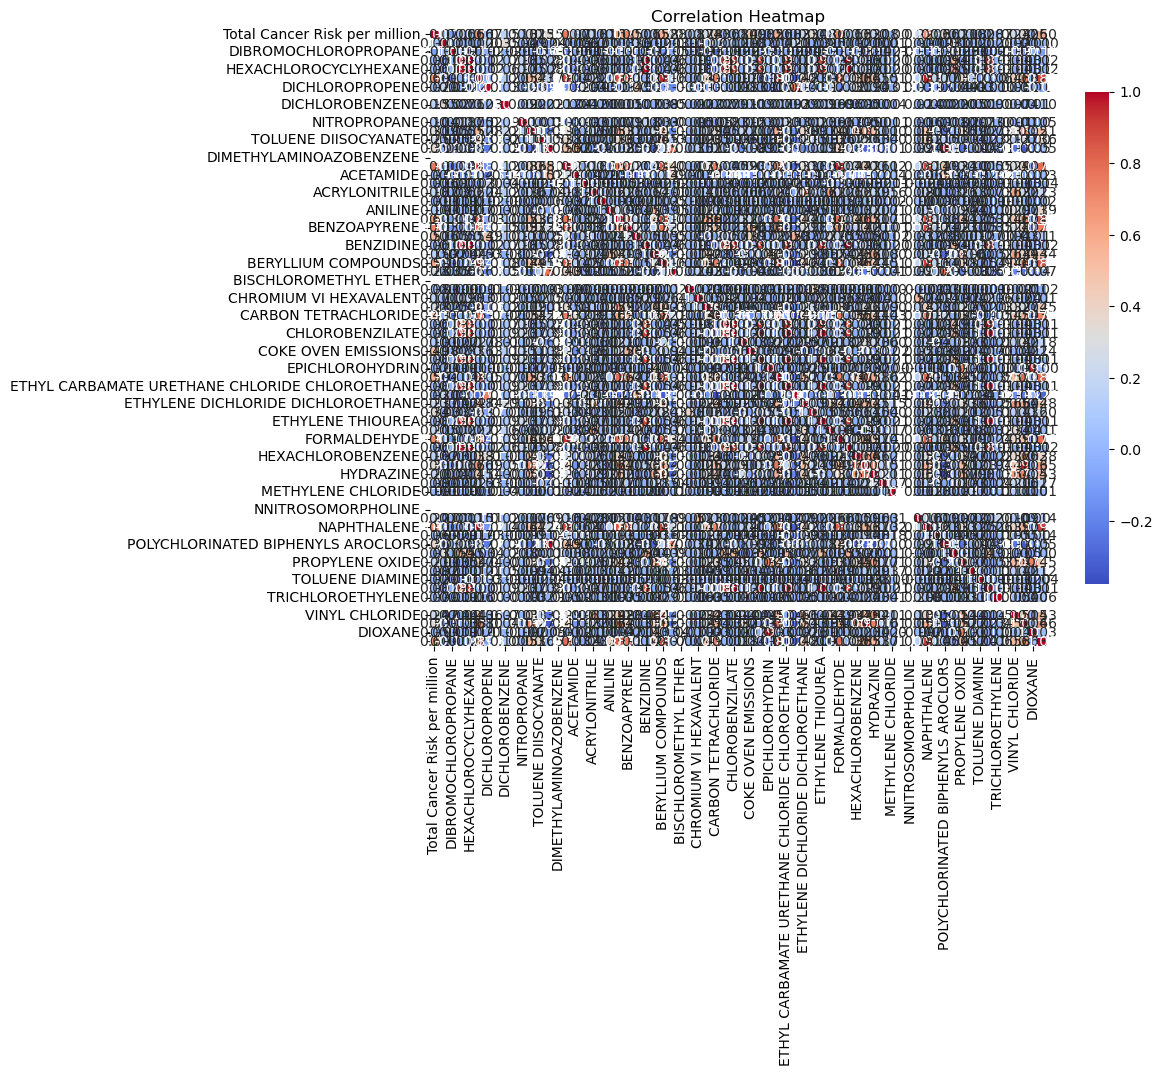

In [214]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='DIBROMOCHLOROPROPANE', ylabel='Total Cancer Risk per million'>

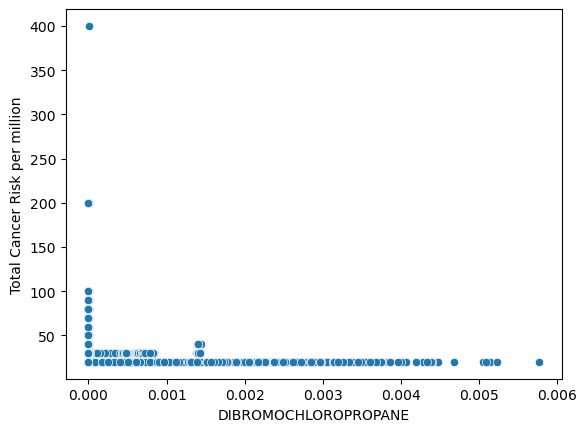

In [171]:
sns.scatterplot(x='DIBROMOCHLOROPROPANE', 
                y='Total Cancer Risk per million', 
                data =Pennsylvania)

<Axes: xlabel='DIPHENYLHYDRAZINE', ylabel='Total Cancer Risk per million'>

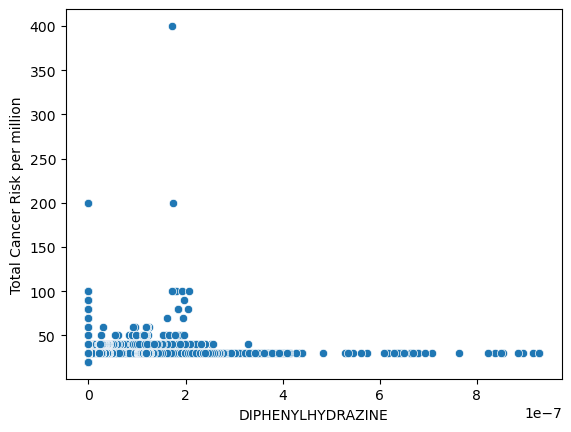

In [172]:
sns.scatterplot(x='DIPHENYLHYDRAZINE', 
                y='Total Cancer Risk per million', 
                data =Pennsylvania)

Pearson Correlation (PA): 0.21422674442649975


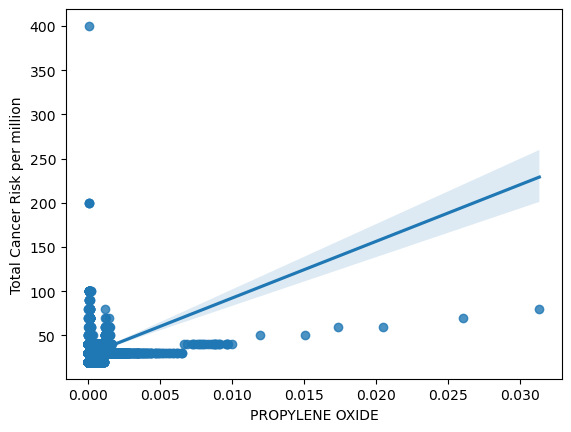

In [217]:
sns.regplot(x='PROPYLENE OXIDE', 
                y='Total Cancer Risk per million', 
                data =Pennsylvania)

# TO-DO: Pearson correlation between 1,1,2-TRICHLOROETHANE and Total Cancer Risk (per million)
correlation_prop_oxide = pearsonr(Pennsylvania['PROPYLENE OXIDE'], Pennsylvania['Total Cancer Risk per million'])
print(f"Pearson Correlation (PA): {correlation_prop_oxide[0]}")

<Axes: xlabel='TETRACHLOROETHYLENE', ylabel='Total Cancer Risk per million'>

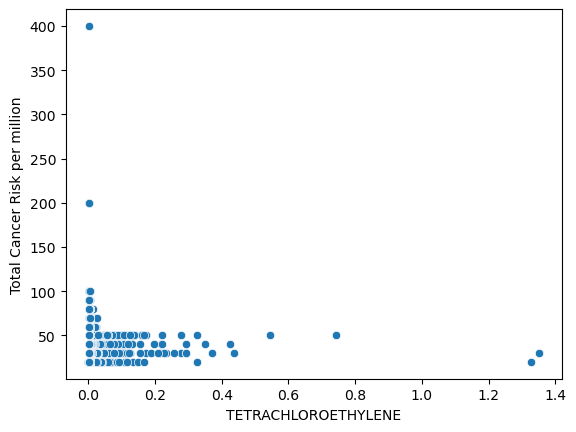

In [174]:
sns.scatterplot(x='TETRACHLOROETHYLENE', 
                y='Total Cancer Risk per million', 
                data =Pennsylvania)

### Create Scatterplot for each chemical

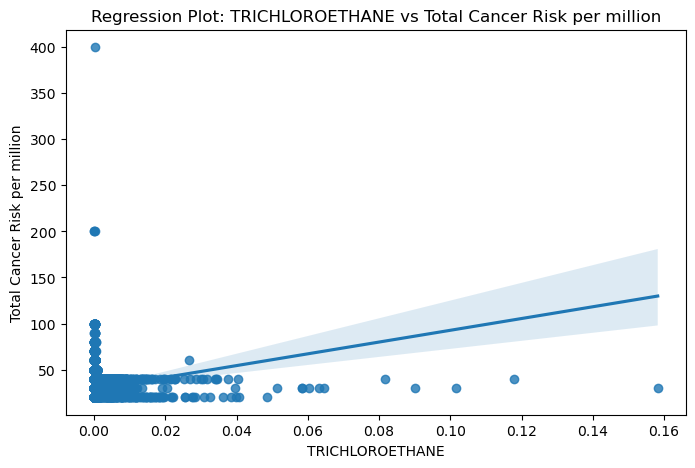

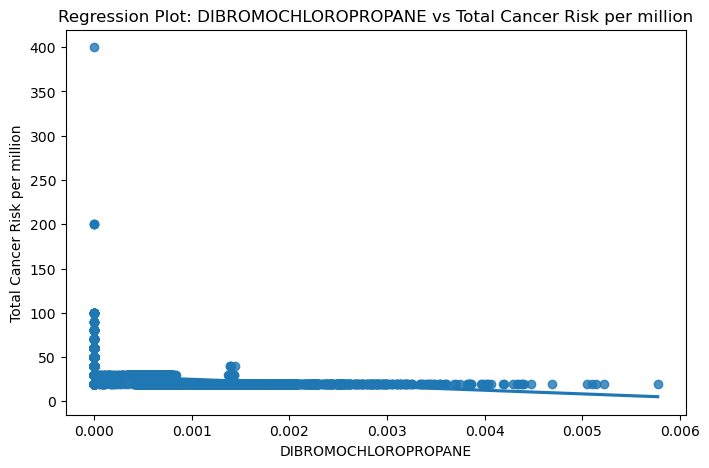

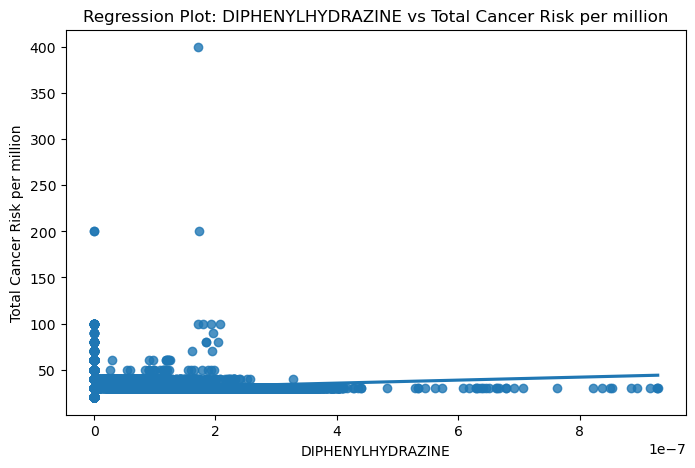

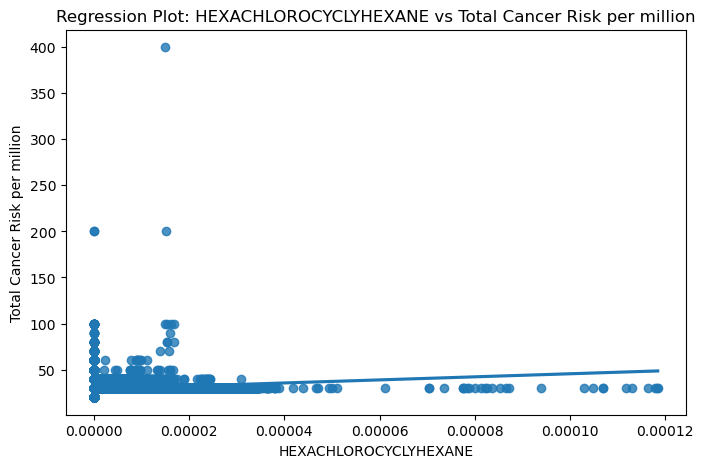

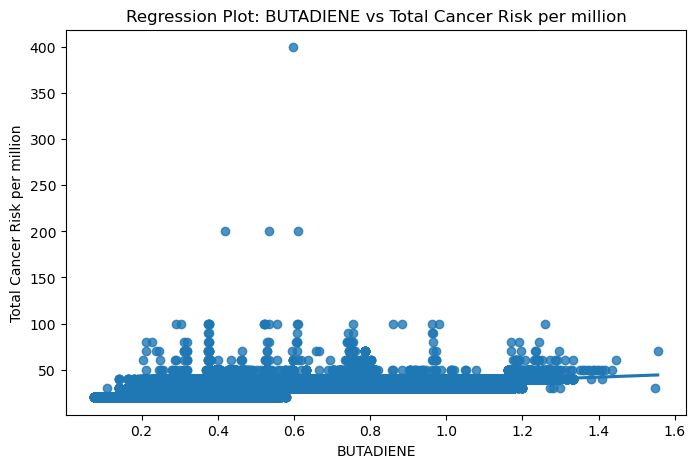

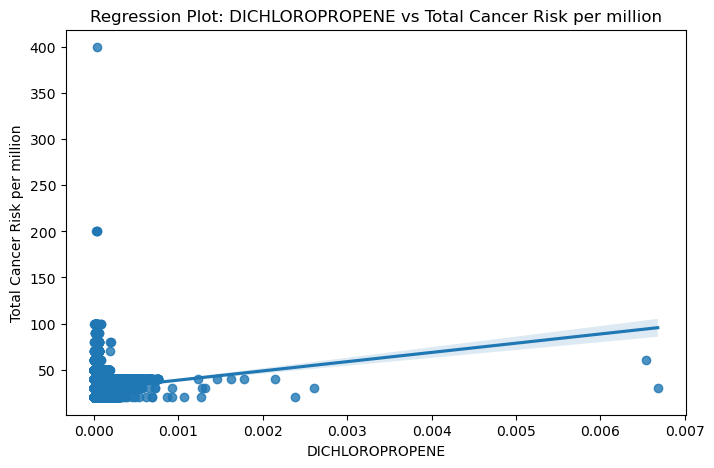

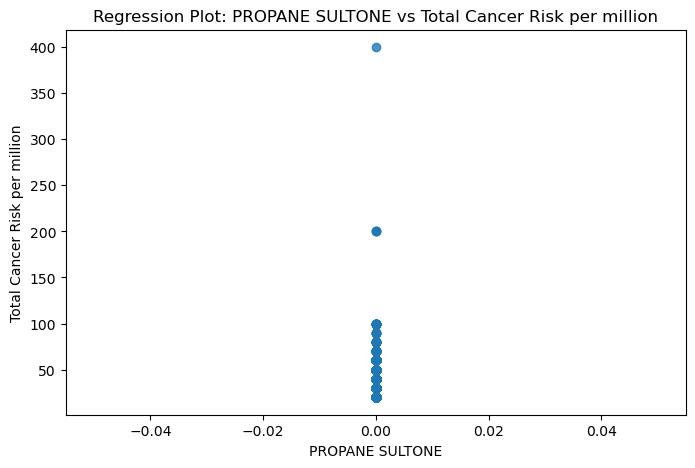

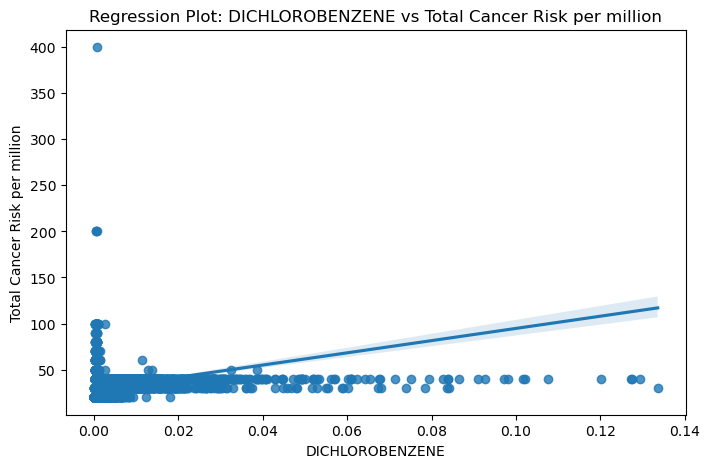

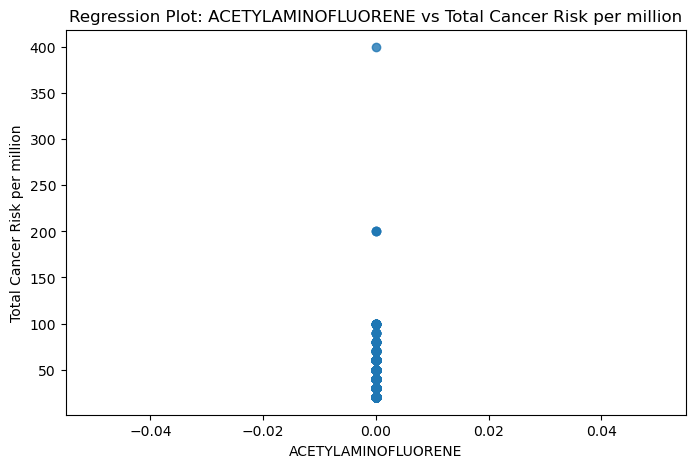

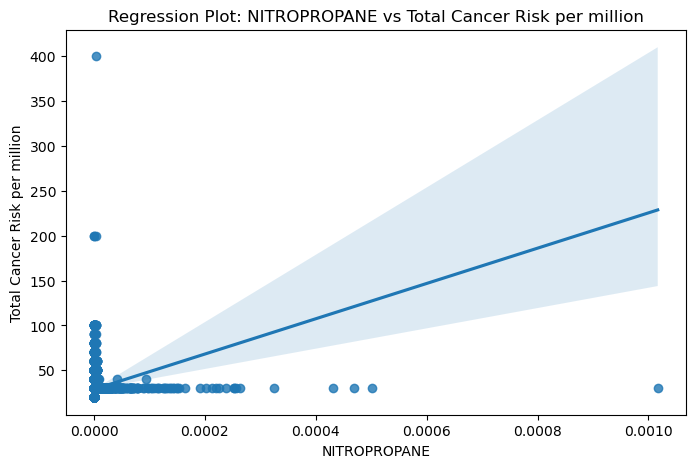

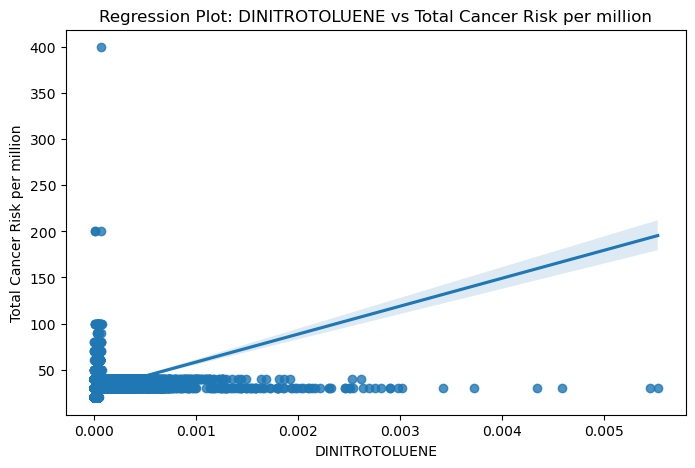

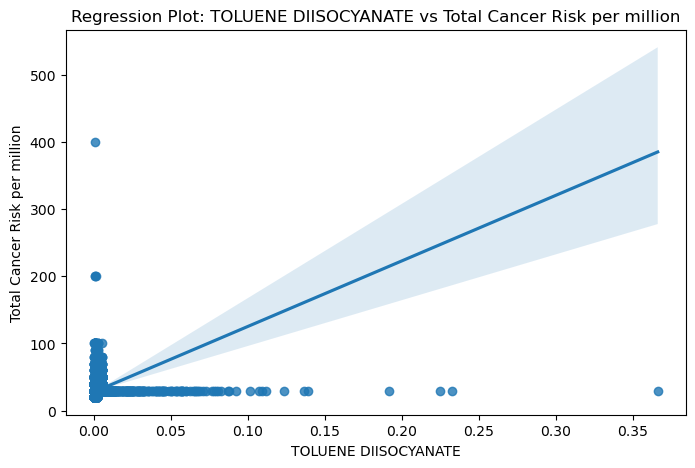

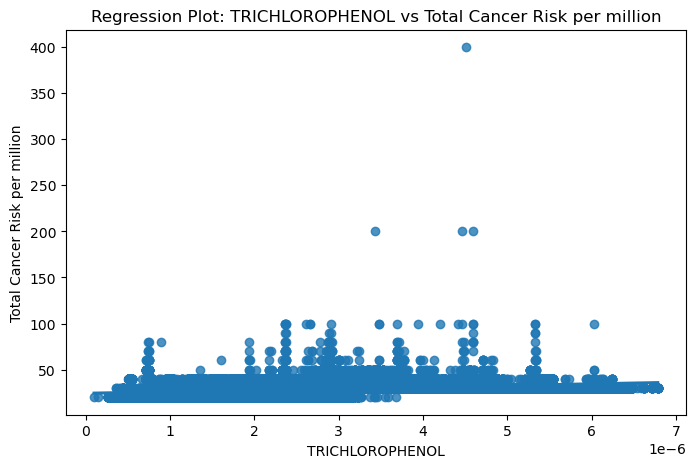

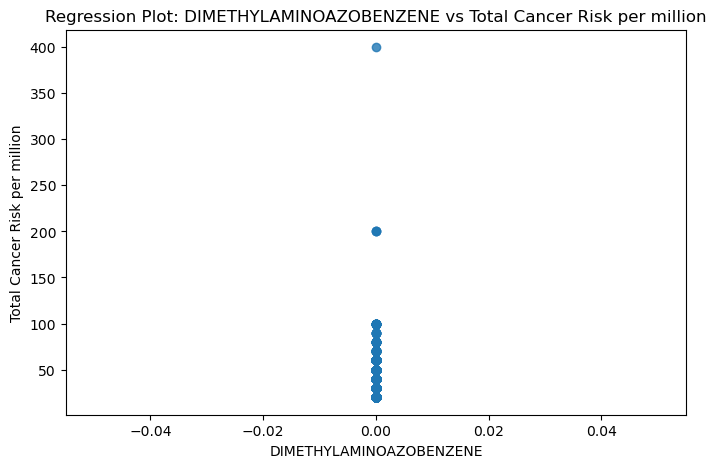

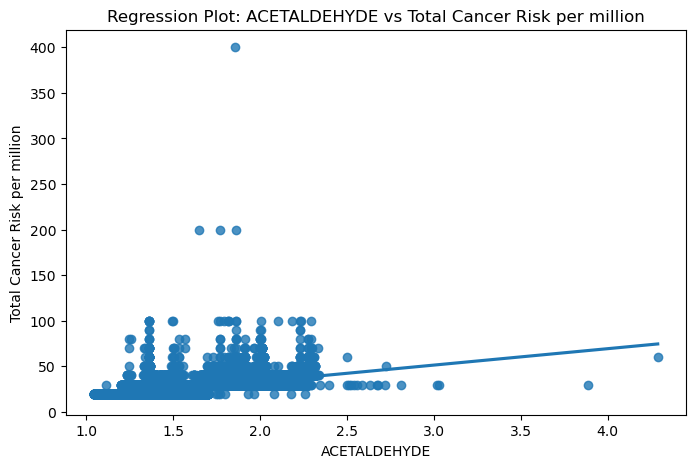

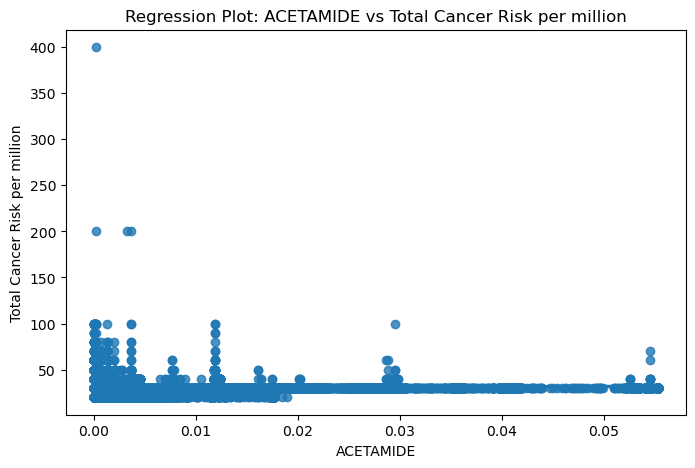

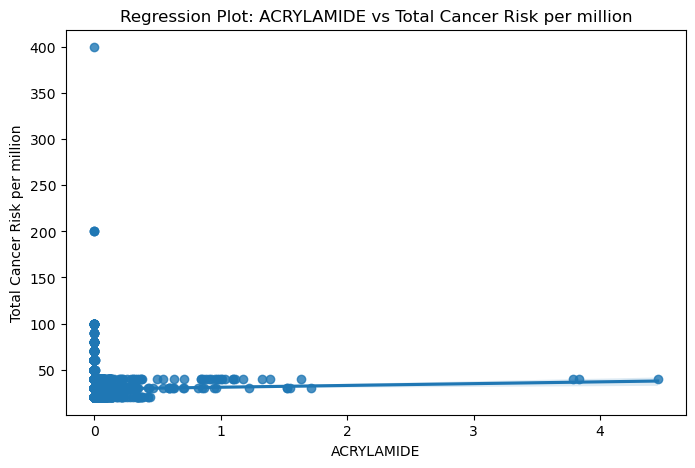

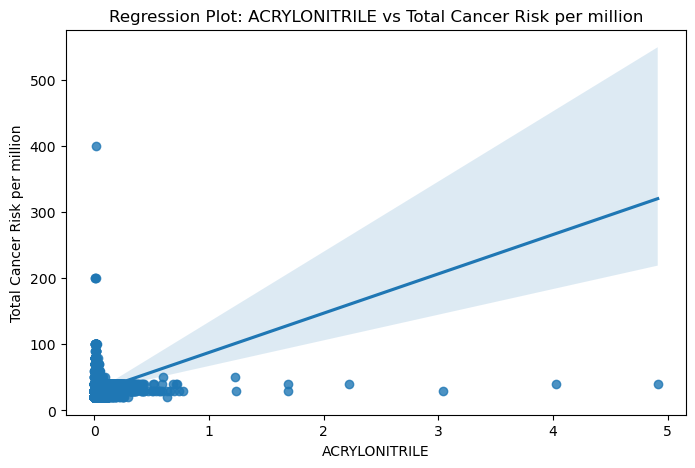

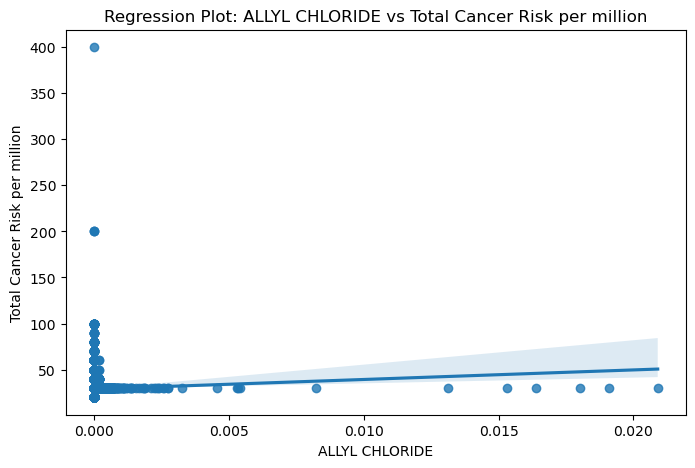

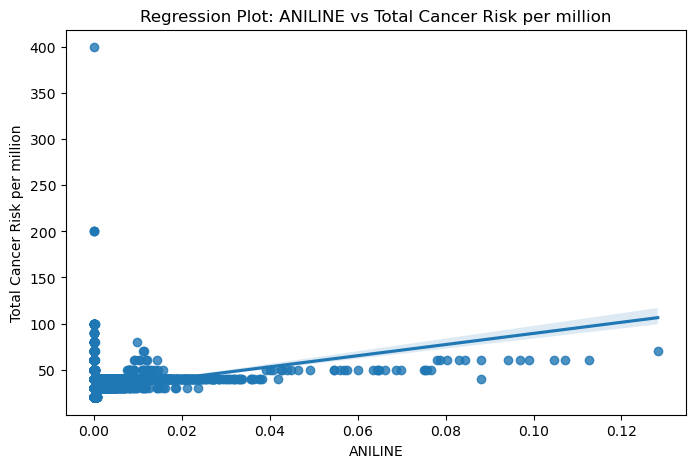

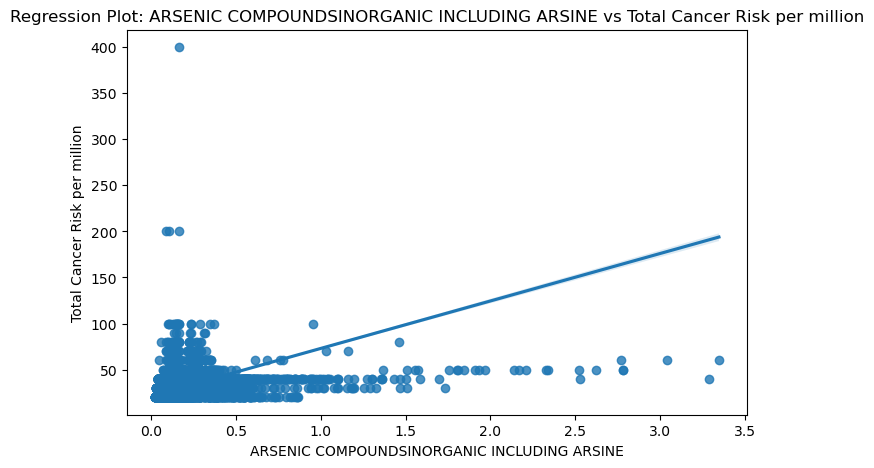

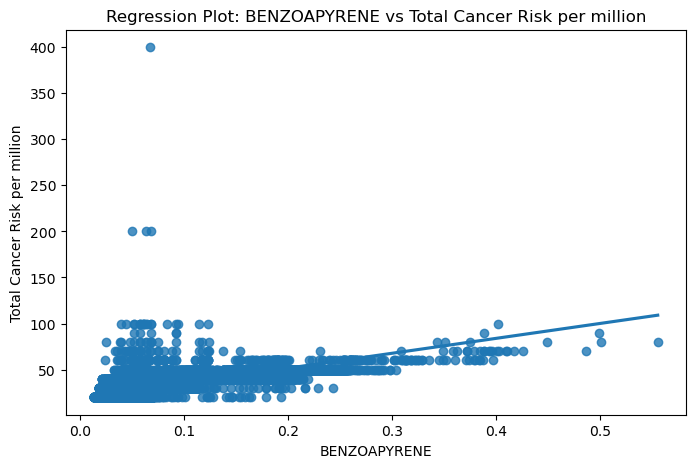

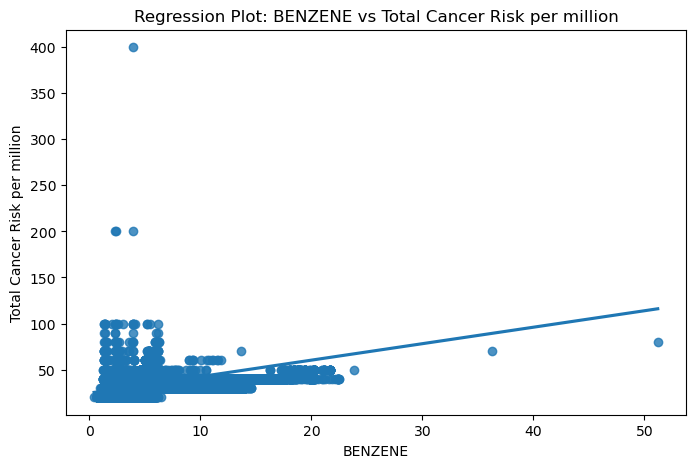

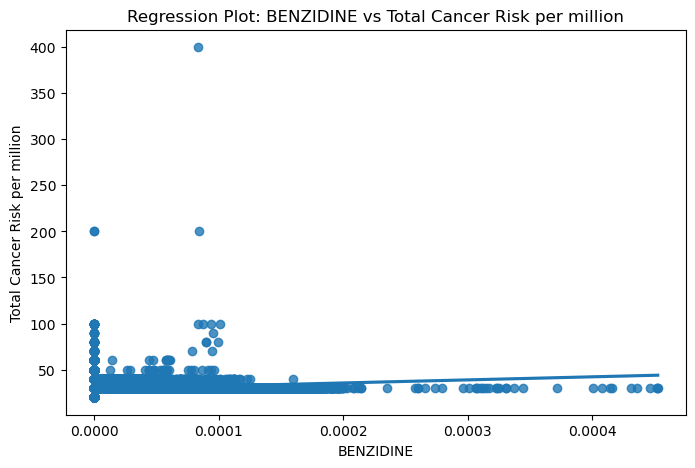

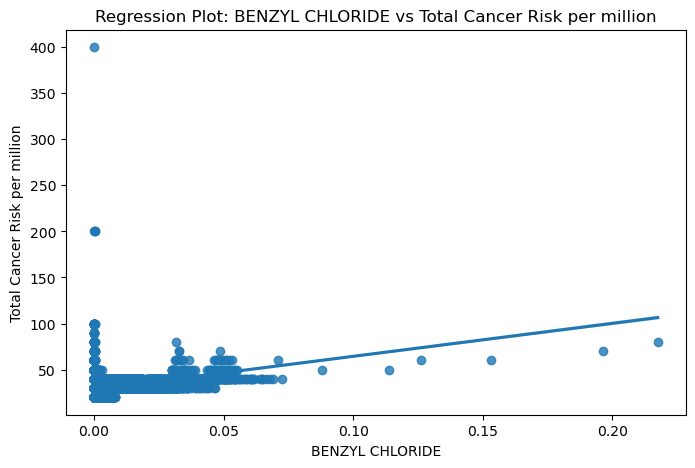

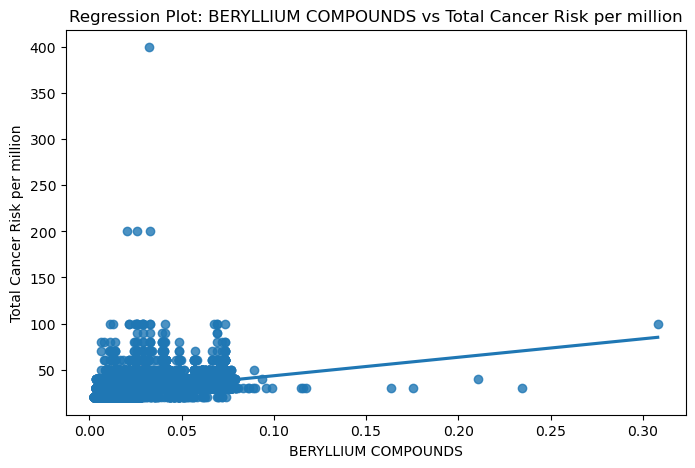

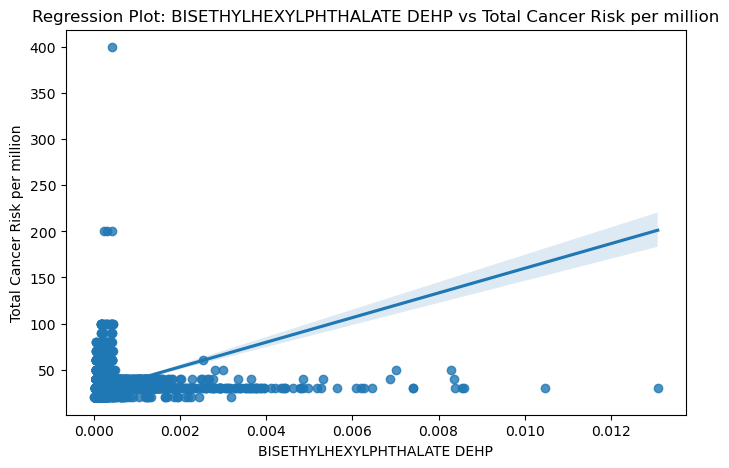

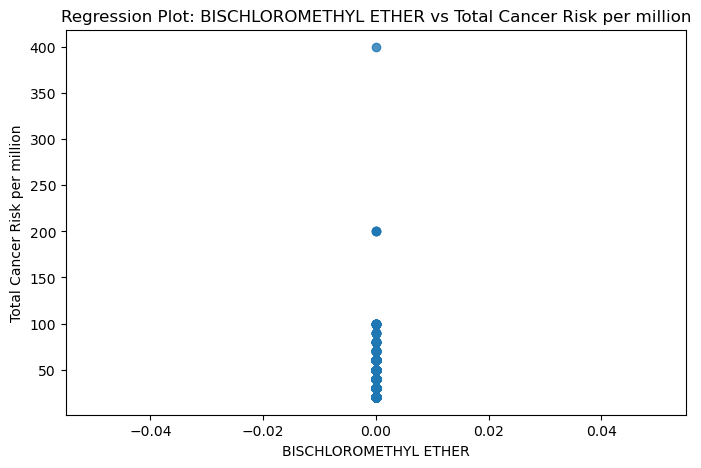

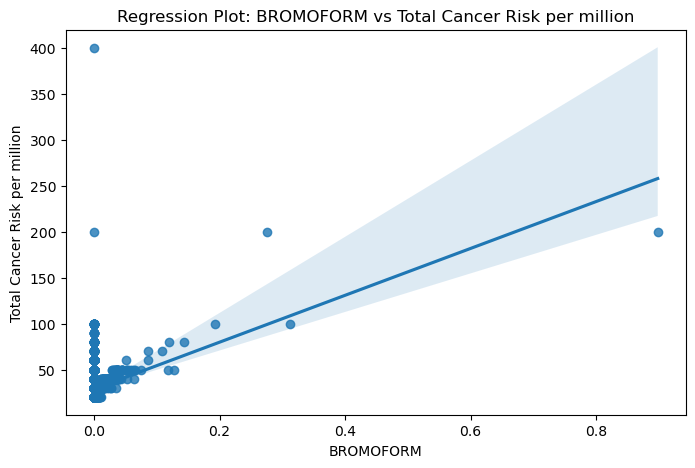

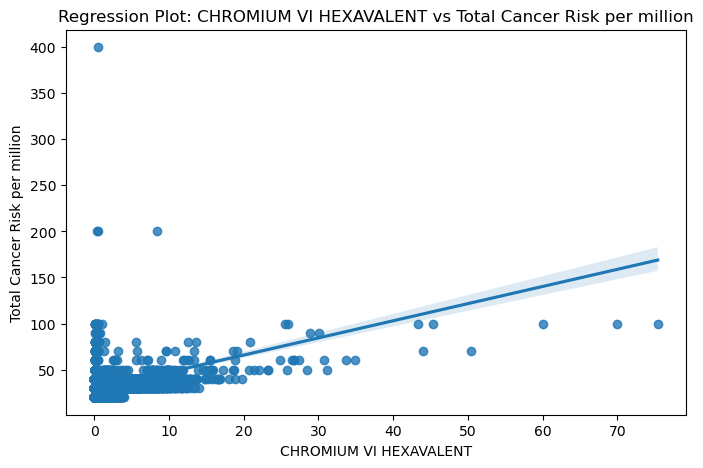

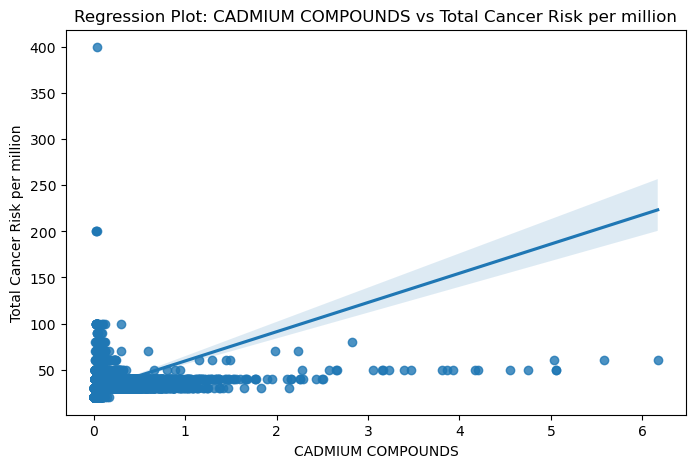

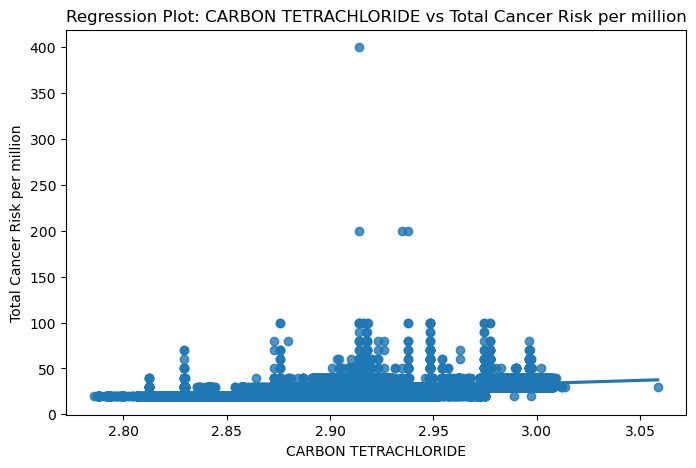

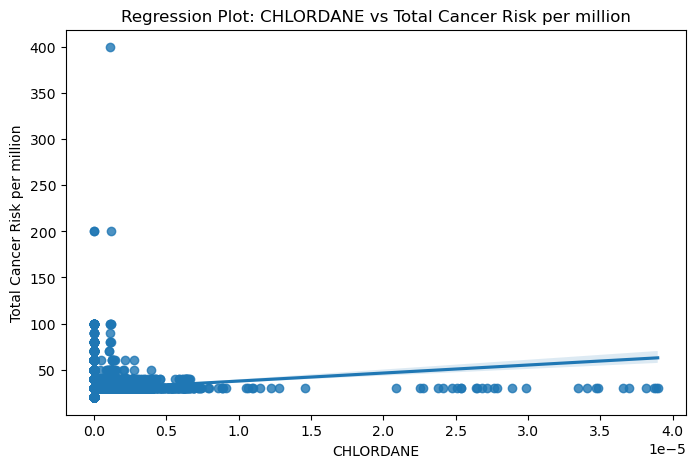

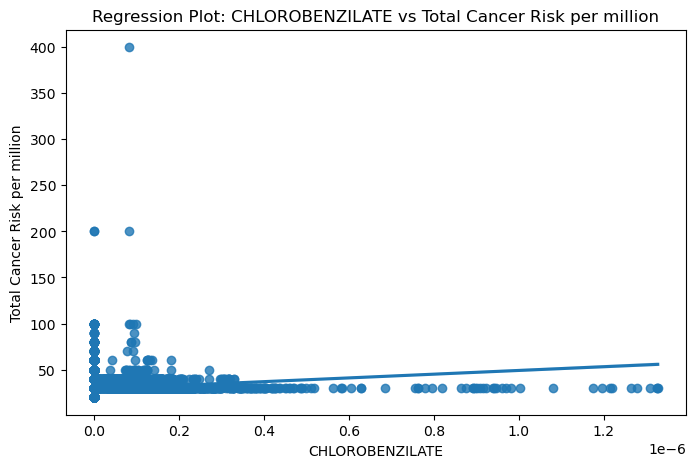

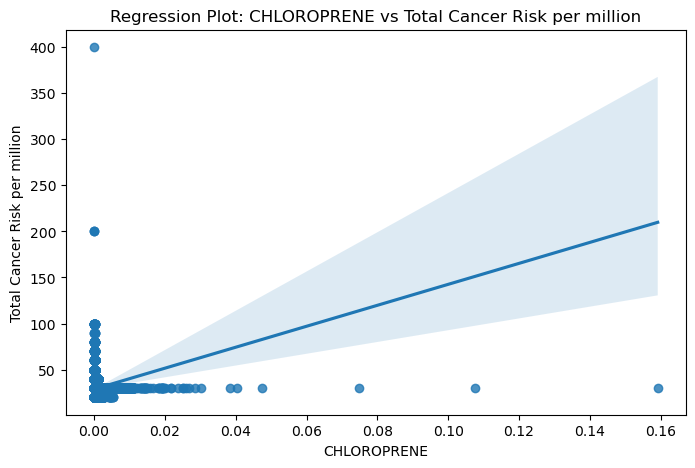

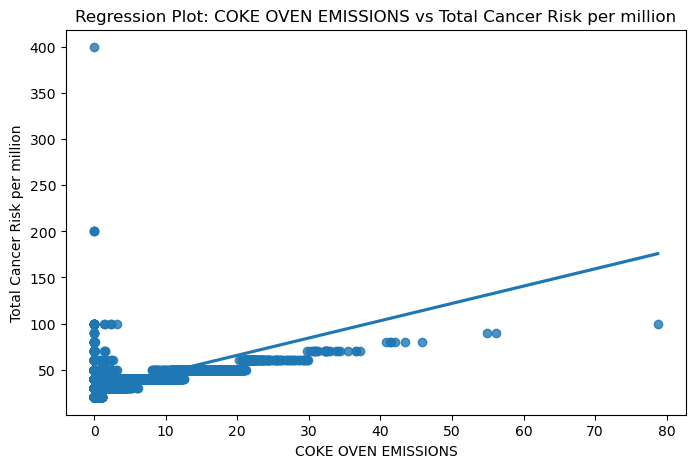

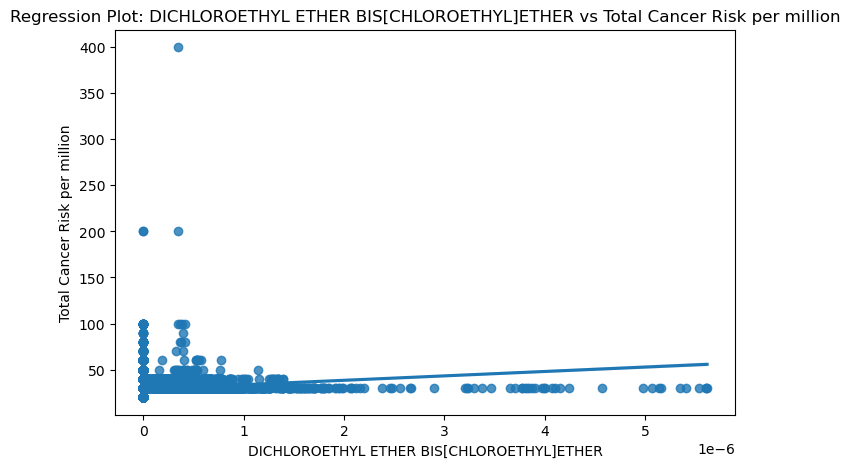

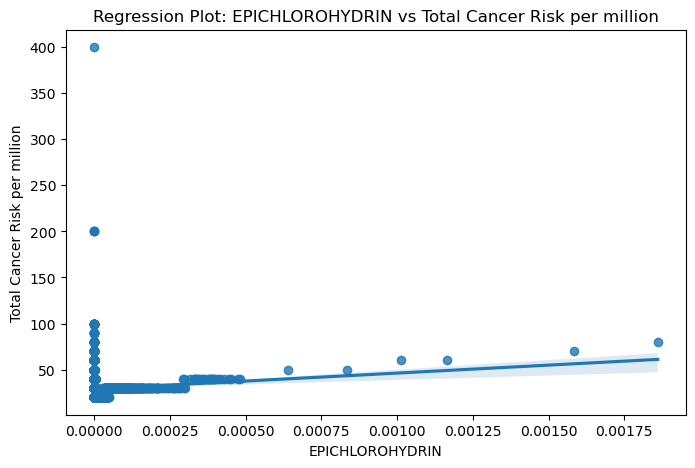

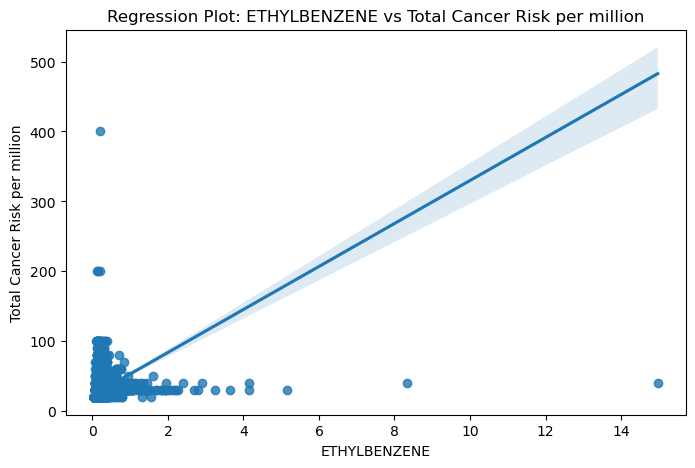

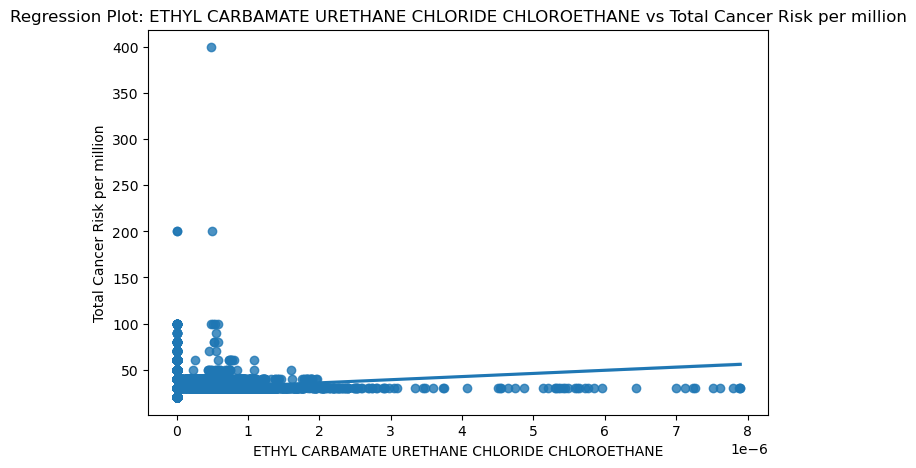

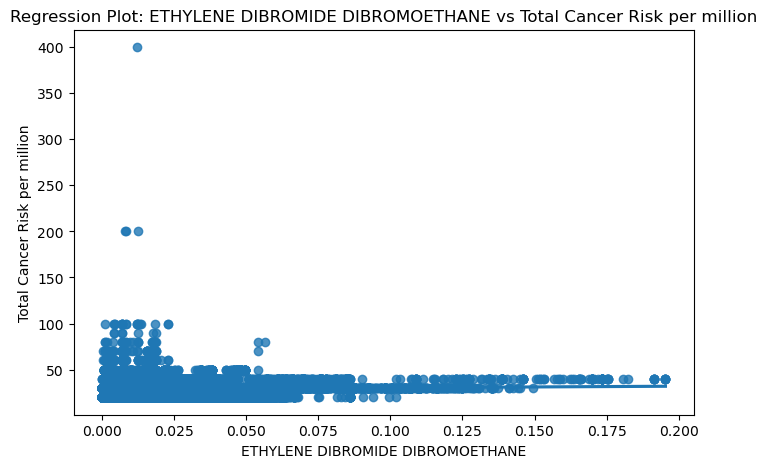

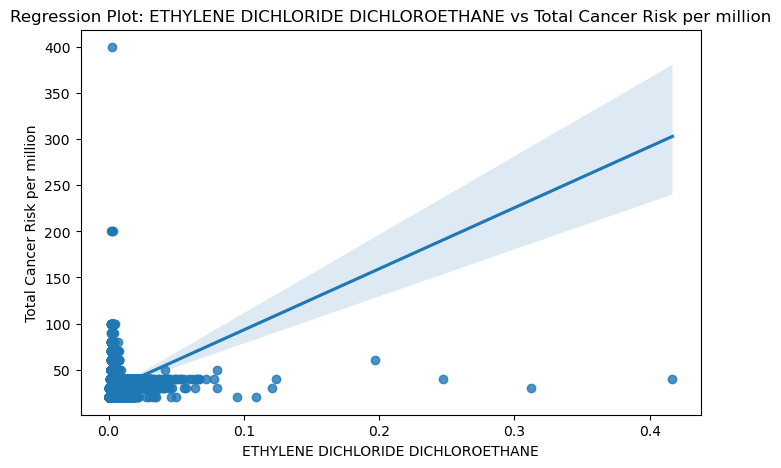

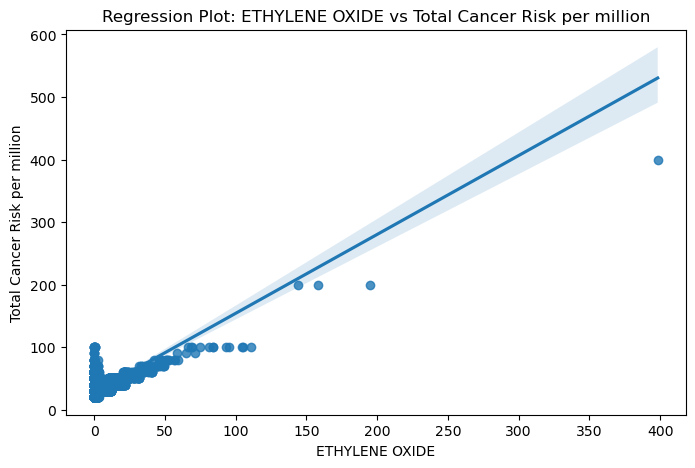

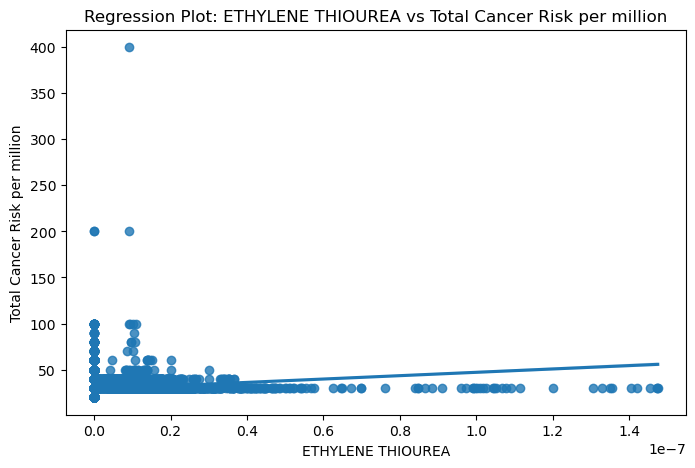

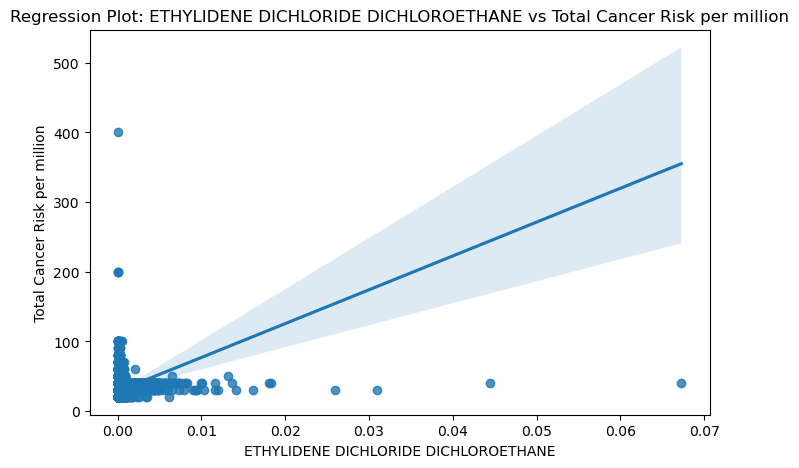

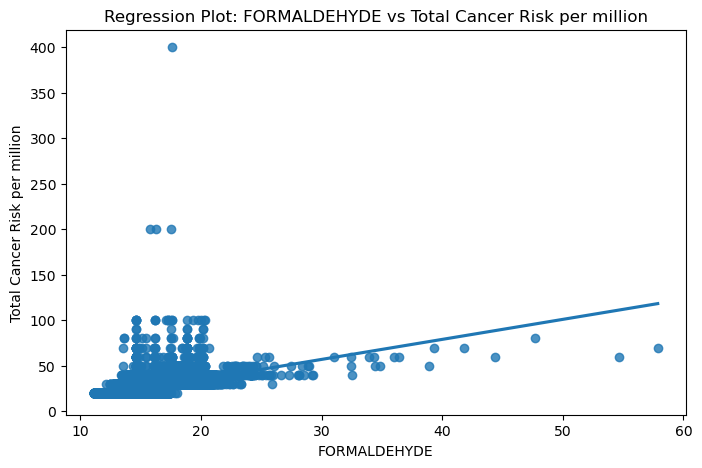

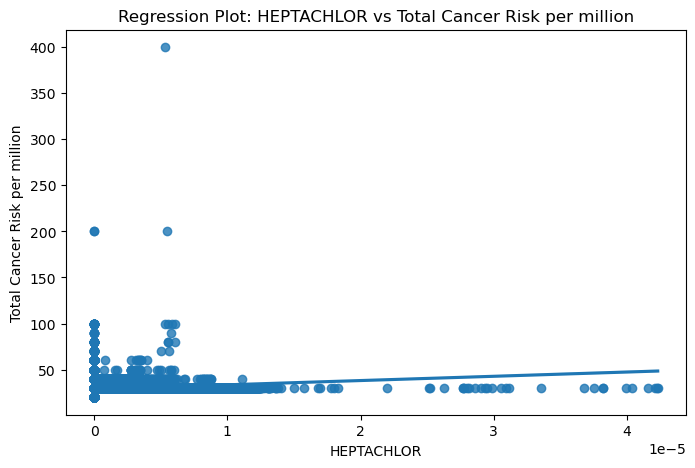

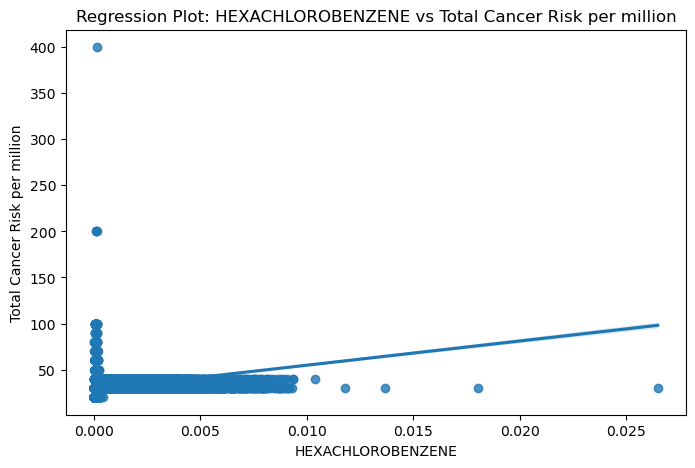

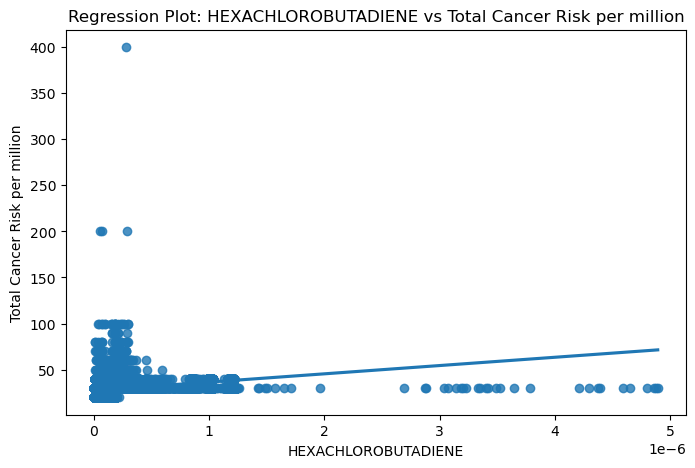

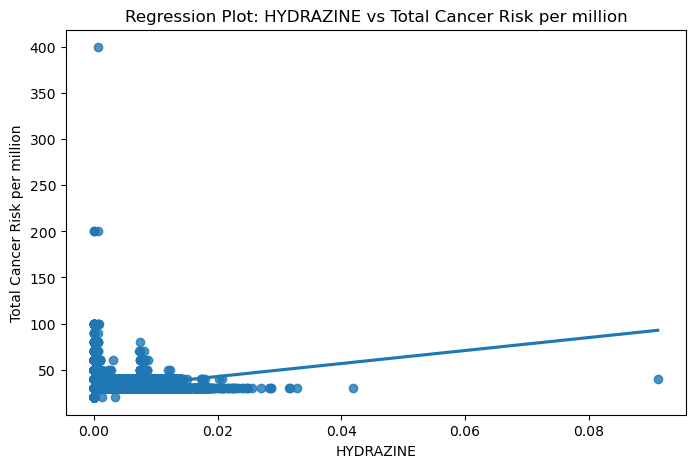

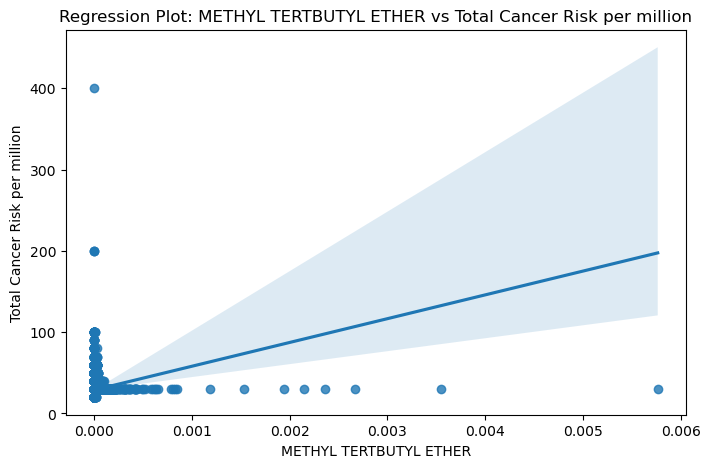

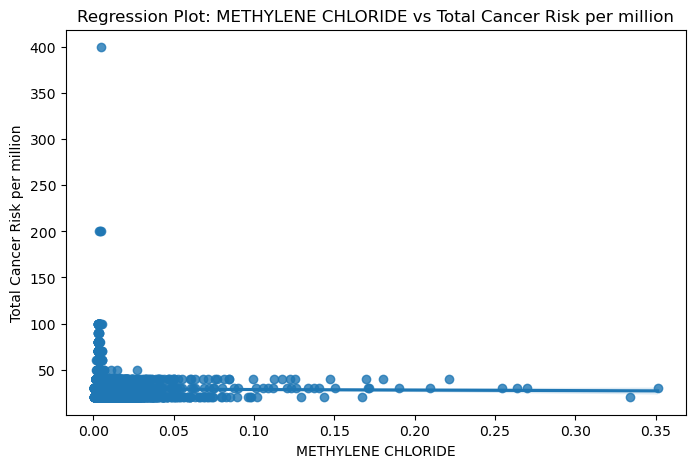

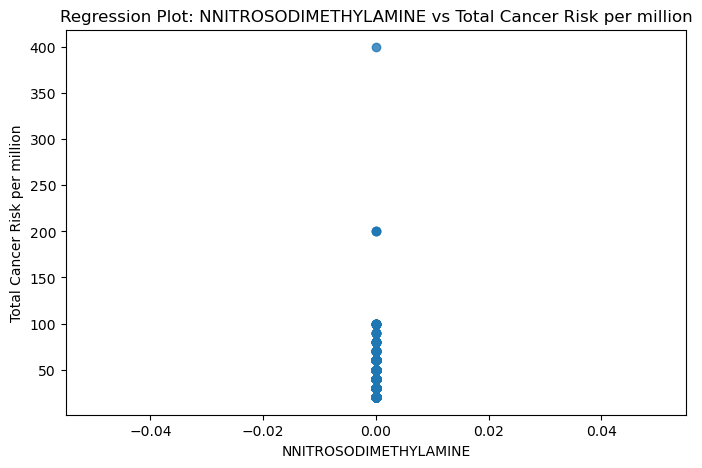

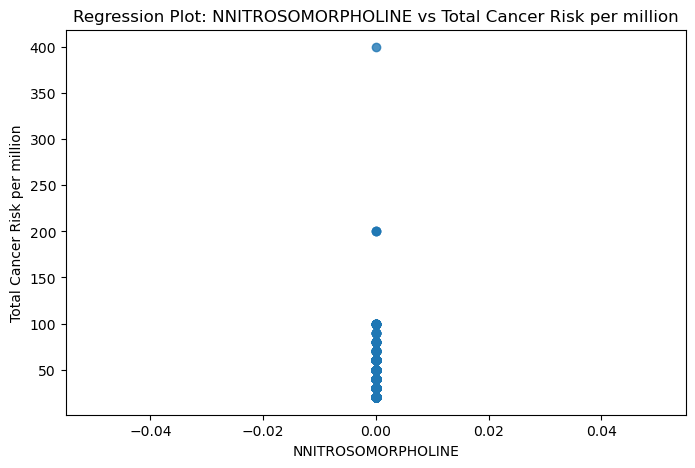

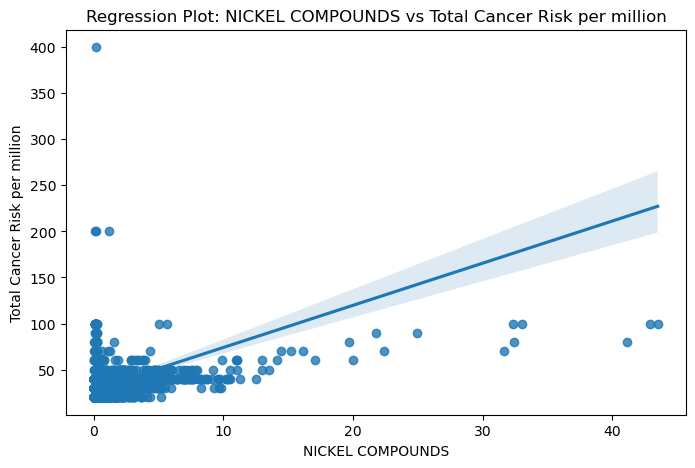

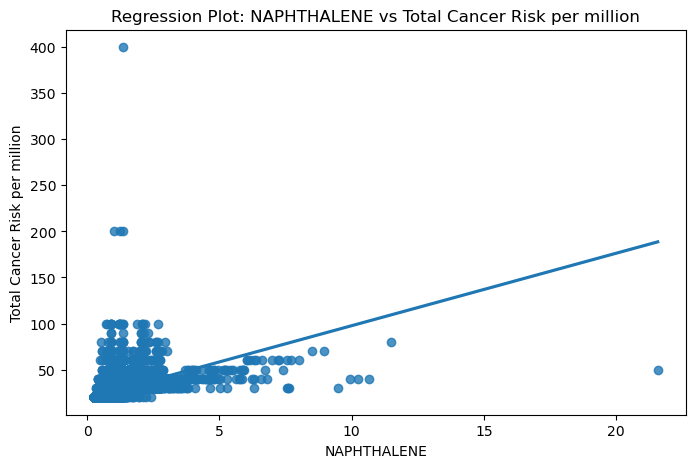

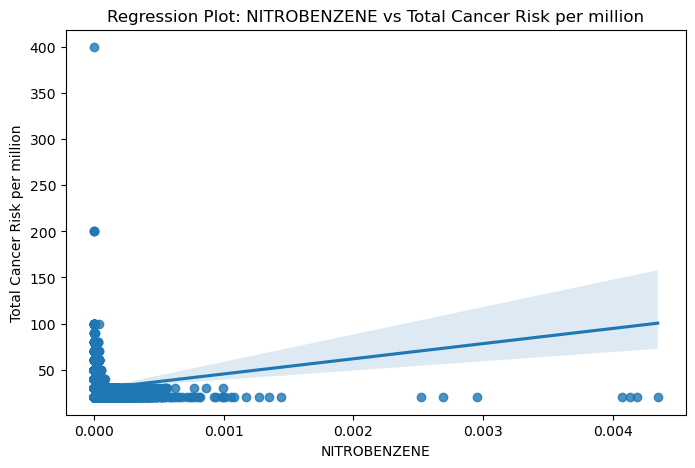

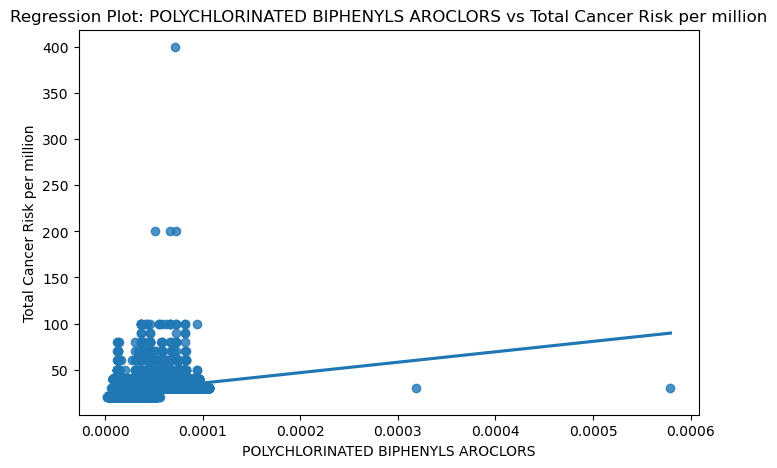

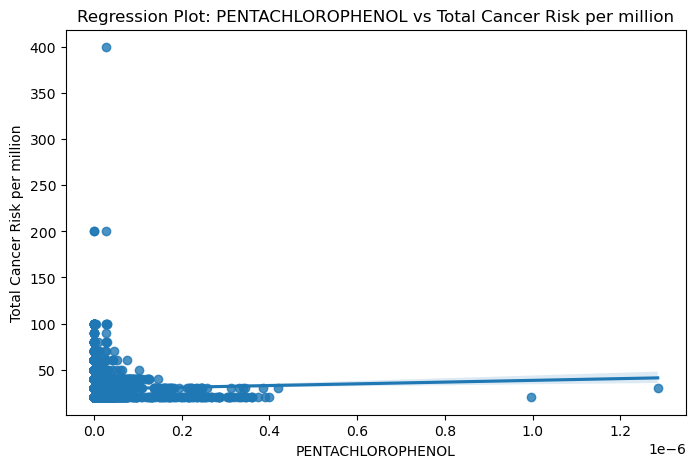

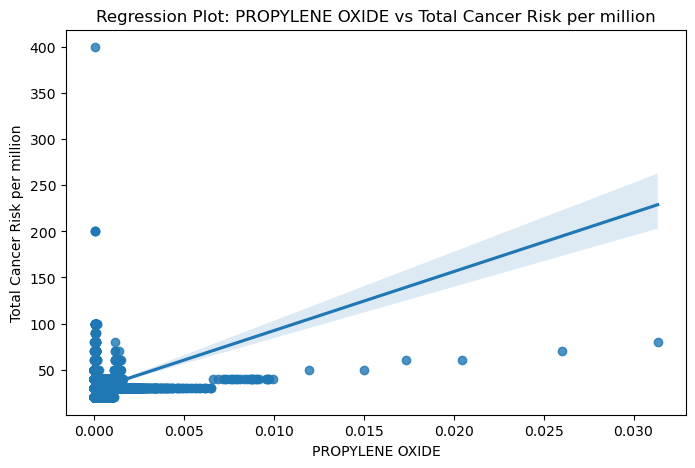

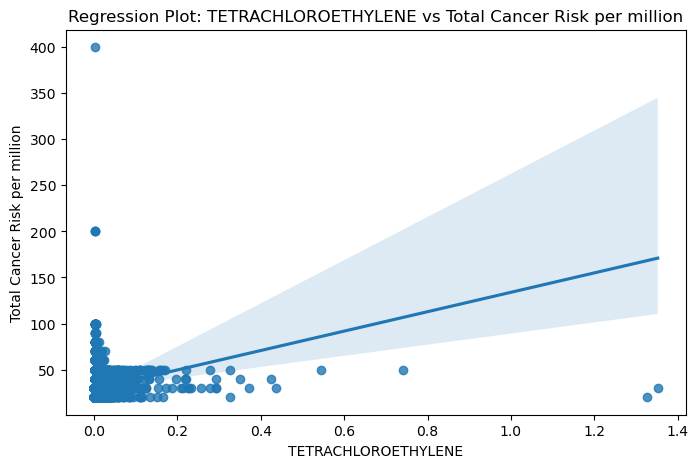

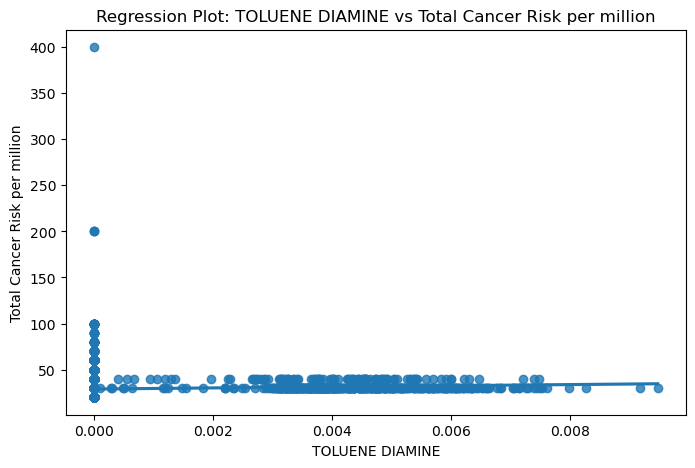

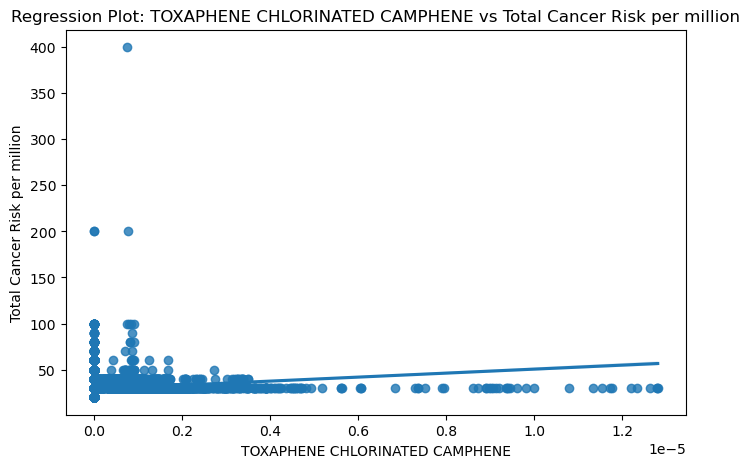

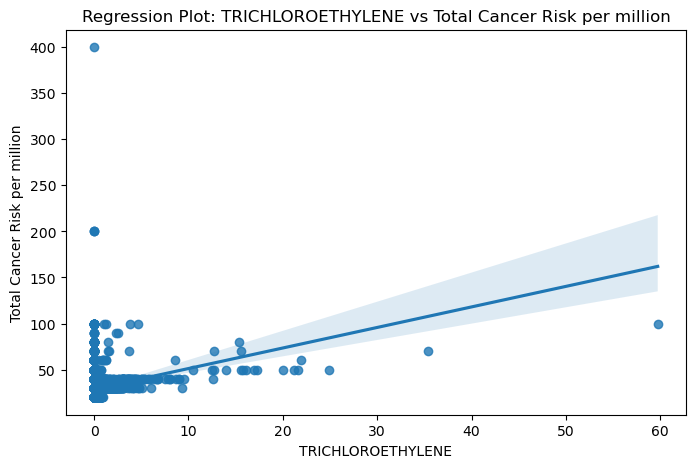

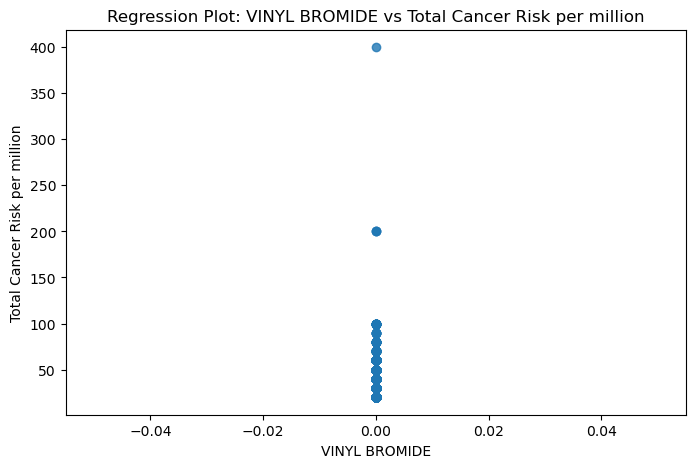

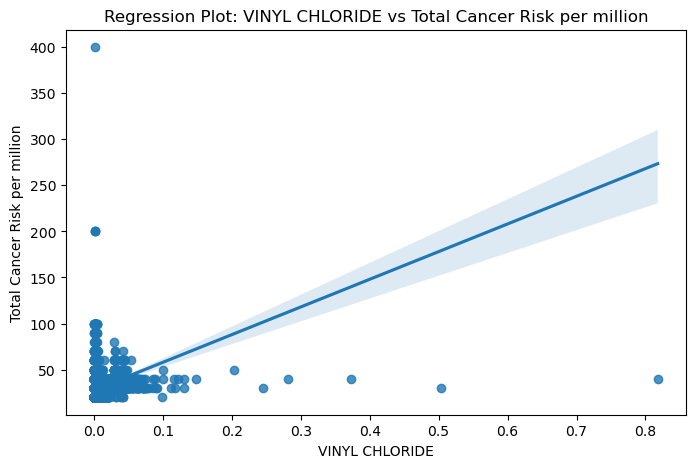

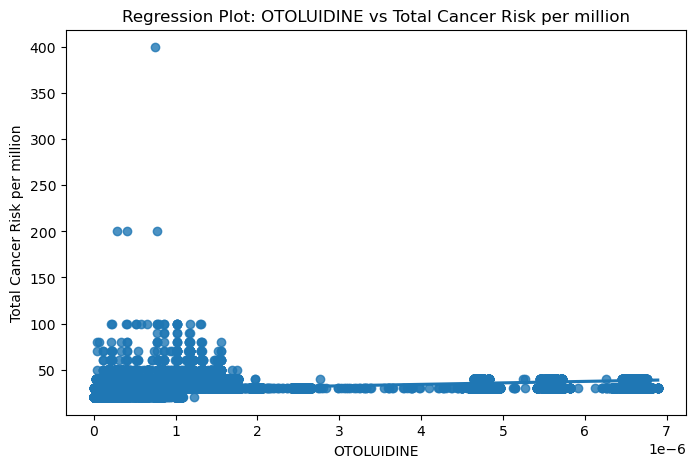

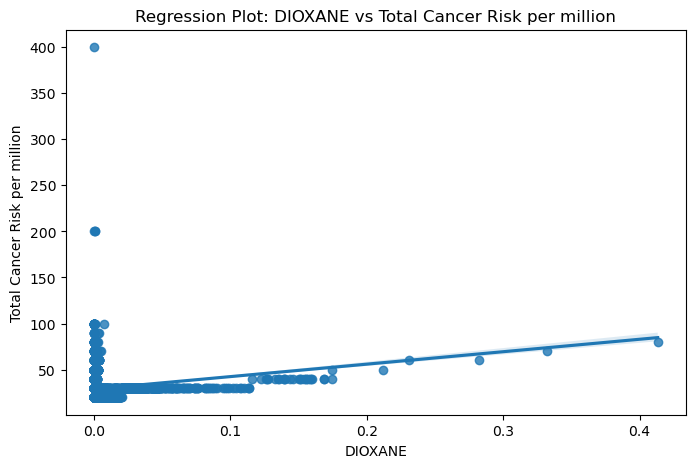

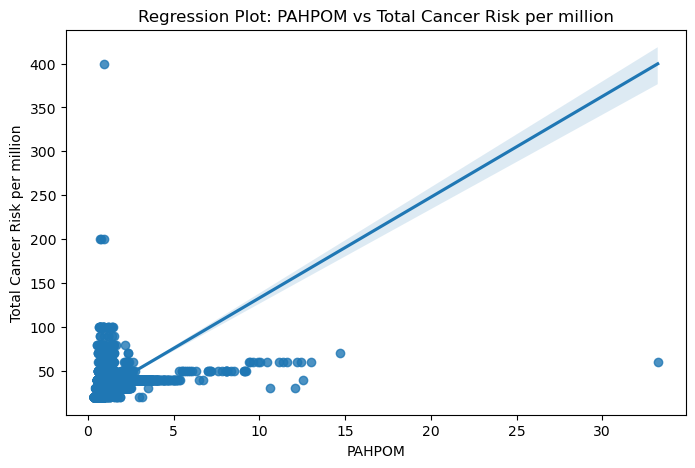

In [221]:
chemical_list= [x for x in PA_Corr.columns if x != 'Total Cancer Risk per million']

for column in chemical_list:
    plt.figure(figsize=(8, 5))  # Set the figure size for better readability
    sns.regplot(data=PA_Corr, x=column, y='Total Cancer Risk per million')
    plt.title(f'Regression Plot: {column} vs Total Cancer Risk per million')
    plt.xlabel(column)
    plt.ylabel('Total Cancer Risk per million')
    plt.show()

### Import Geopandas to plot data against state map

In [175]:
pip install geopandas

In [201]:
import geopandas as gpd


In [194]:
# Getting to know GEOJSON file:
state = gpd.read_file("Data/ne_110m_admin_1_states_provinces.shp")
state.head()

featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1       Montana   
2  http://en.wikipedia.org/wiki/North_Dakota     US        1  North Dakota   
3        http://en.wikipedia.org/wiki/Hawaii     US        8        Hawaii   
4         http://en.wikipedia.org/wiki/Idaho     US        1         Idaho   

    name_alt  ... FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL FCLASS_SE  \
0   MN|Minn.  ...      None      None      None      None      None      None   
1   MT|Mont.  ...      None      None      None      None      None      None   
2    ND|N.D.  ...      None      None      None      None      None      None   
3  HI|Hawaii  ...      None      None      None      None      None      None   
4   ID|Idaho  ...      None      None      None      None      None      None   

  FCLASS_BD FCLASS_UA FCLASS_TLC  \
0      None      None       None   
1      None      None       None   
2      None      None       None   
3      None      None       None   
4      None      None       None   

                                            geometry  
0  POLYGON ((-89.95766 47.28691, -90.13175 47.292...  
1  POLYGON ((-116.04823 49.00037, -113.0595 49.00...  
2  POLYGON ((-97.22894 49.00089, -97.21414 48.902...  
3  MULTIPOLYGON (((-155.93665 19.05939, -155.9080...  
4  POLYGON ((-116.04823 49.00037, -115.9678 47.95...  

[5 rows x 122 columns]

In [198]:
state = state[state['iso_3166_2'] == 'US-PA']

In [200]:
state

featurecla  scalerank adm1_code  diss_me iso_3166_2  \
47  Admin-1 scale rank          2  USA-3560     3560      US-PA   

                                    wikipedia iso_a2  adm0_sr          name  \
47  http://en.wikipedia.org/wiki/Pennsylvania     US        1  Pennsylvania   

                           name_alt  ... FCLASS_ID FCLASS_PL FCLASS_GR  \
47  Commonwealth of Pennsylvania|PA  ...      None      None      None   

   FCLASS_IT FCLASS_NL FCLASS_SE FCLASS_BD FCLASS_UA FCLASS_TLC  \
47      None      None      None      None      None       None   

                                             geometry  
47  POLYGON ((-80.51893 40.64111, -80.51627 42.324...  

[1 rows x 122 columns]

<Axes: >

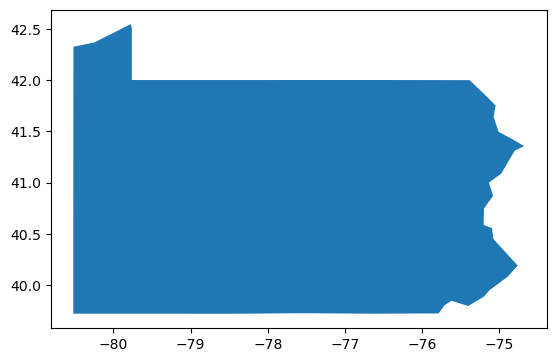

In [199]:
state.plot()

In [187]:
pwd

'c:\\Users\\vanes\\Documents\\Data Science Capstone Proj'

In [97]:
DC_MD_VA = df[df['State'].isin(['DC','MD','VA'])]

In [99]:
DC_MD_VA

State    EPA Region                County   FIPS            Block  \
15317     DC  EPA Region 3  District of Columbia  11001  110010001011000   
15318     DC  EPA Region 3  District of Columbia  11001  110010001011001   
15319     DC  EPA Region 3  District of Columbia  11001  110010001011003   
15320     DC  EPA Region 3  District of Columbia  11001  110010001011004   
15321     DC  EPA Region 3  District of Columbia  11001  110010001011005   
...      ...           ...                   ...    ...              ...   
477470    VA  EPA Region 3       Winchester city  51840  518400003024016   
477471    VA  EPA Region 3       Winchester city  51840  518400003024019   
477472    VA  EPA Region 3       Winchester city  51840  518400003024020   
477473    VA  EPA Region 3       Winchester city  51840  518400003024022   
477474    VA  EPA Region 3       Winchester city  51840  518400003024023   

        Population  Total Cancer Risk (per million)  1,1,2-TRICHLOROETHANE  \
15317          607                               40           6.176340e-06   
15318          282                               40           6.267510e-06   
15319           85                               40           6.202310e-06   
15320           56                               40           6.235670e-06   
15321           89                               40           6.266930e-06   
...            ...                              ...                    ...   
477470         113                               30           1.031770e-07   
477471         209                               30           9.860900e-08   
477472         138                               30           9.859630e-08   
477473          13                               30           9.886470e-08   
477474          18                               30           1.033090e-07   

        1,2-DIBROMO-3-CHLOROPROPANE  1,2-DIPHENYLHYDRAZINE  ...  \
15317                           0.0                    0.0  ...   
15318                           0.0                    0.0  ...   
15319                           0.0                    0.0  ...   
15320                           0.0                    0.0  ...   
15321                           0.0                    0.0  ...   
...                             ...                    ...  ...   
477470                          0.0                    0.0  ...   
477471                          0.0                    0.0  ...   
477472                          0.0                    0.0  ...   
477473                          0.0                    0.0  ...   
477474                          0.0                    0.0  ...   

        PROPYLENE OXIDE  TETRACHLOROETHYLENE  2,4-TOLUENE DIAMINE  \
15317          0.000211             0.006792                  0.0   
15318          0.000210             0.006792                  0.0   
15319          0.000211             0.006792                  0.0   
15320          0.000211             0.006792                  0.0   
15321          0.000211             0.006792                  0.0   
...                 ...                  ...                  ...   
477470         0.000013             0.003191                  0.0   
477471         0.000013             0.003019                  0.0   
477472         0.000013             0.003019                  0.0   
477473         0.000013             0.003019                  0.0   
477474         0.000013             0.003191                  0.0   

        TOXAPHENE (CHLORINATED CAMPHENE)  TRICHLOROETHYLENE  VINYL BROMIDE  \
15317                                0.0           0.021882              0   
15318                                0.0           0.021881              0   
15319                                0.0           0.021879              0   
15320                                0.0           0.021880              0   
15321                                0.0           0.021879              0   
...                                  ...               